In [1]:
import pandas
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
os.listdir("./",)

['TestB.csv',
 'TestB_Precision_matrix.csv',
 'mongoTokens.py',
 'wordFreqLabel_1.csv',
 'numFeatures.csv',
 'TypeA1Models.ipynb',
 'TestB_F1_matrix.csv',
 'TypeB2Models.ipynb',
 'TypeE1Models.ipynb',
 'wordFreqLabel_0.csv',
 'TestB_Accuracy_matrix.csv',
 'model_metricsD.csv',
 'model_metricsE1.csv',
 'wordFreqDN.csv',
 'dataProcess.ipynb',
 'tokenized_words.txt',
 'metrics.csv',
 'EDA.ipynb',
 'TypeB1Models.ipynb',
 'model_metricsB1.csv',
 'wordFreq.csv',
 'model_metricsB2.csv',
 'TestB_Recall_matrix.csv',
 'Eval.ipynb',
 'model_metricsA2.csv',
 'model_metricsA1.csv',
 'tmetrics.csv',
 'TypeCModels.ipynb',
 'model.ipynb',
 'testResults.ipynb',
 'model_metricsC.csv',
 '__pycache__',
 'TypeA2Models.ipynb',
 'TypeDModels.ipynb']

In [3]:
import pandas as pd

file_list = ['model_metricsA1.csv', 'model_metricsA2.csv', 'model_metricsB1.csv', 'model_metricsB2.csv', 'model_metricsC.csv','model_metricsD.csv']
dfs = []

for i, file in enumerate(file_list):
    if file.endswith('.csv'):
        df = pd.read_csv(file)
        # Modify the "Model" column name differently
        df = df.rename(columns={"Model": "Model"})
        
        # Modify the other column names based on the file index
        if i == 0:
            df.columns = [f"{col}A1" if col != "Model" else col for col in df.columns]
        elif i == 1:
            df.columns = [f"{col}A2" if col != "Model" else col for col in df.columns]
        elif i == 2:
            df.columns = [f"{col}B1" if col != "Model" else col for col in df.columns]
        elif i == 3:
            df.columns = [f"{col}B2" if col != "Model" else col for col in df.columns]
        elif i == 4:
            df.columns = [f"{col}C" if col != "Model" else col for col in df.columns]
        elif i == 5:
            df.columns = [f"{col}D" if col != "Model" else col for col in df.columns]
        dfs.append(df)
    else:
        continue

combined_df = pd.concat(dfs, ignore_index=True)

# Merge the DataFrames on the common "Model" column
merged_df = pd.DataFrame()
for i in range(len(dfs)):
    if i == 0:
        merged_df = dfs[i]
    else:
        merged_df = pd.merge(merged_df, dfs[i], on='Model', how='outer')

In [4]:

merged_df.to_csv("./metrics.csv")
merged_df.columns

Index(['Model', 'AccuracyA1', 'PrecisionA1', 'RecallA1', 'F1A1', 'AccuracyA2',
       'PrecisionA2', 'RecallA2', 'F1A2', 'AccuracyB1', 'PrecisionB1',
       'RecallB1', 'F1B1', 'AccuracyB2', 'PrecisionB2', 'RecallB2', 'F1B2',
       'AccuracyC', 'PrecisionC', 'RecallC', 'F1C', 'AccuracyD', 'PrecisionD',
       'RecallD', 'F1D'],
      dtype='object')

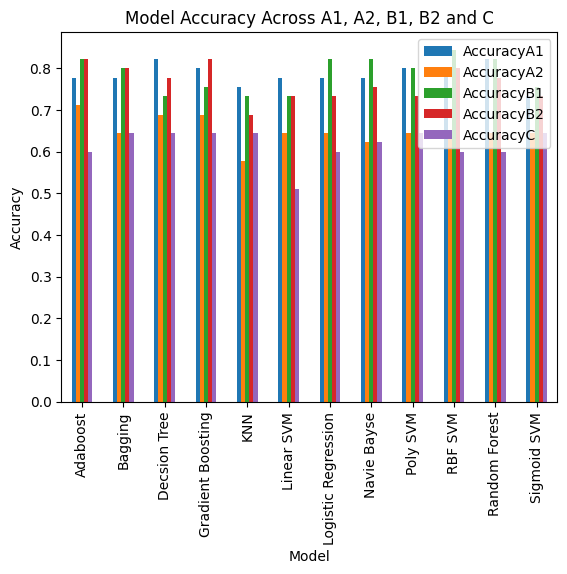

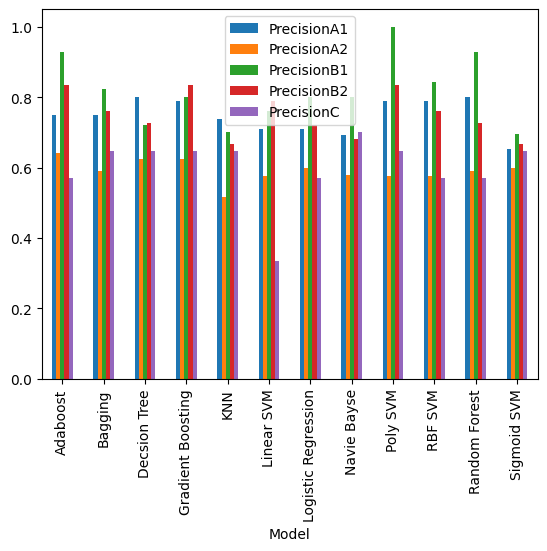

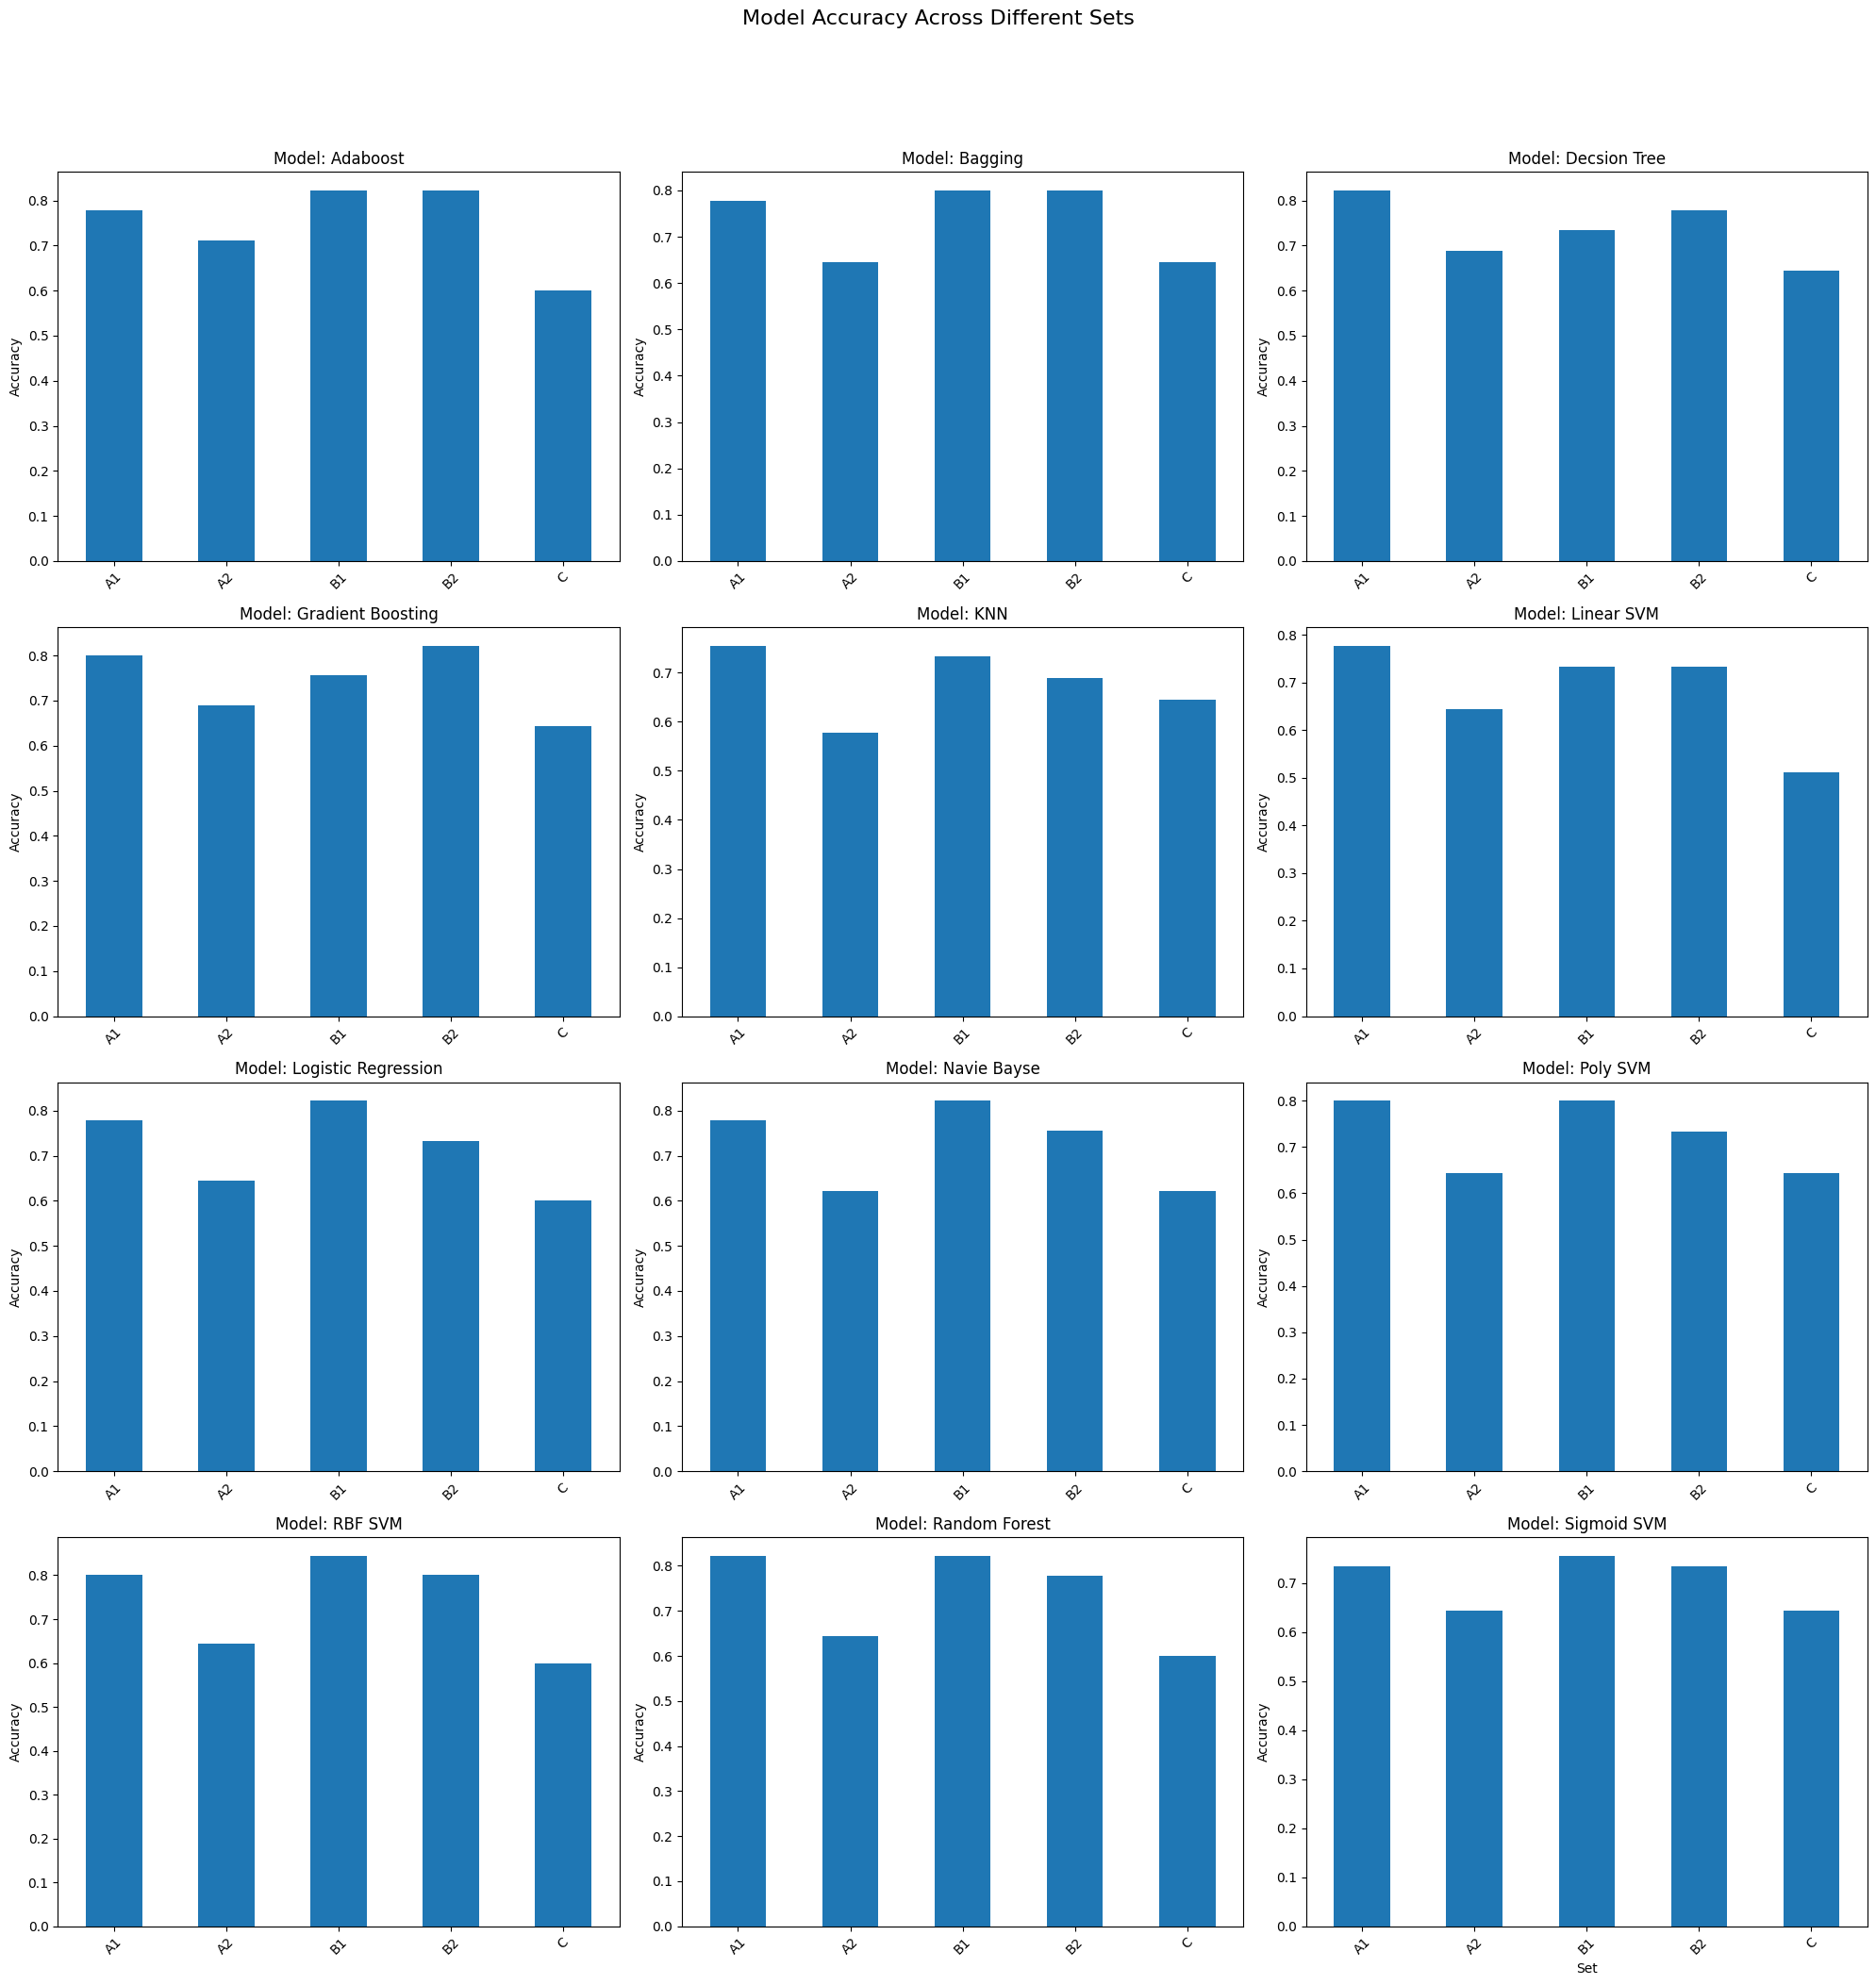

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'merged_df' is your DataFrame

# Plot 1: Models Performance in A1, A2, B1, B2 and C (Bar chart)
model_acc = merged_df.groupby('Model')[['AccuracyA1', 'AccuracyA2', 'AccuracyB1', 'AccuracyB2', 'AccuracyC']].first()
model_pres = merged_df.groupby('Model')[['PrecisionA1', 'PrecisionA2', 'PrecisionB1', 'PrecisionB2', 'PrecisionC']].max()
model_performances = merged_df.groupby('Model')[['AccuracyA1', 'AccuracyA2', 'AccuracyB1', 'AccuracyB2', 'AccuracyC']]
model_performances = merged_df.groupby('Model')[['AccuracyA1', 'AccuracyA2', 'AccuracyB1', 'AccuracyB2', 'AccuracyC']]
model_acc.plot(kind='bar')  # Already set to bar chart
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Across A1, A2, B1, B2 and C')
plt.show()
model_pres.plot(kind='bar')
plt.show()
model_acc.head()

num_models = len(model_acc)
num_rows = 4
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Plotting bar chart for each model
for i, (model, data) in enumerate(model_acc.iterrows()):
    row = i // num_cols
    col = i % num_cols
    data.plot(kind='bar', ax=axes[row, col], color='C0')
    axes[row, col].set_title(f'Model: {model}')
    axes[row, col].set_ylabel('Accuracy')
    axes[row, col].set_xticklabels(['A1', 'A2', 'B1', 'B2', 'C'], rotation=45)

# Turn off empty subplots
for i in range(num_models, num_rows*num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')
fig.suptitle('Model Accuracy Across Different Sets', fontsize=16, y=1.05)
plt.xlabel('Set')
plt.tight_layout()
plt.show()

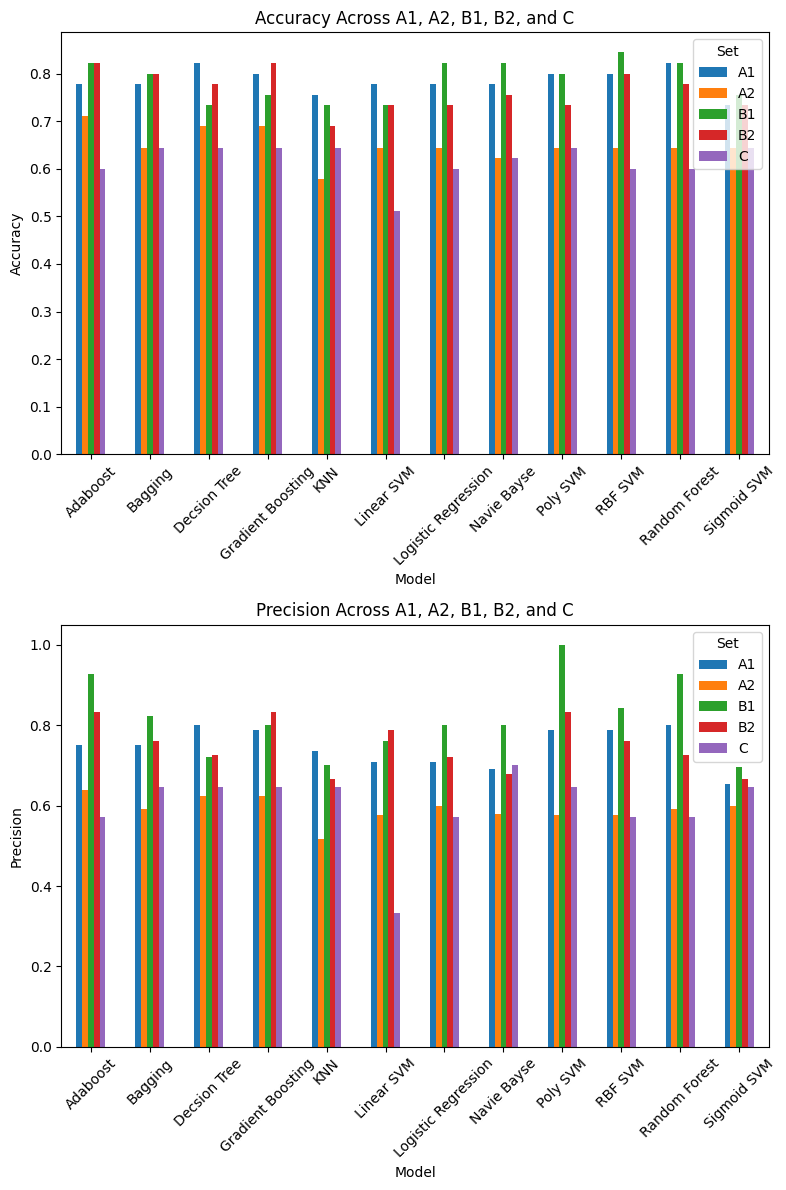

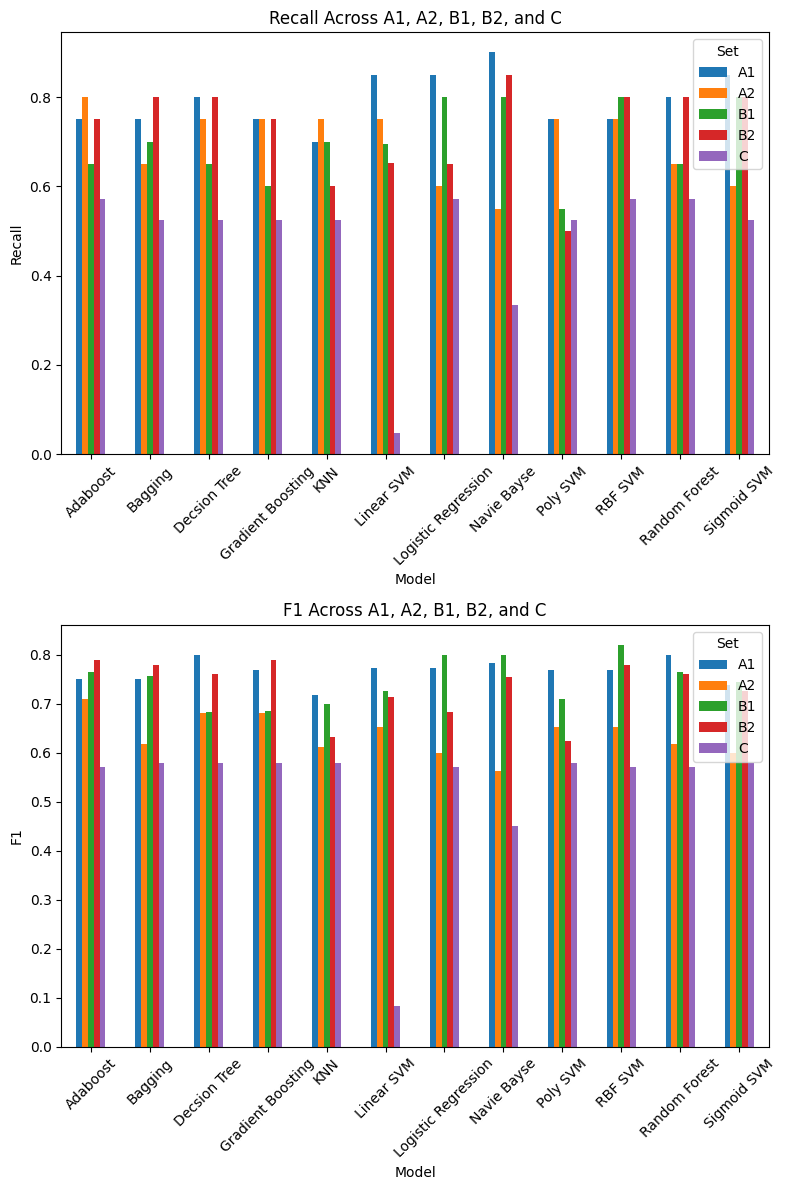

In [6]:
model_acc = merged_df.groupby('Model')[['AccuracyA1', 'AccuracyA2', 'AccuracyB1', 'AccuracyB2', 'AccuracyC']].first()
model_pres = merged_df.groupby('Model')[['PrecisionA1', 'PrecisionA2', 'PrecisionB1', 'PrecisionB2', 'PrecisionC']].max()
model_recall = merged_df.groupby('Model')[['RecallA1', 'RecallA2', 'RecallB1', 'RecallB2', 'RecallC']].max()
model_f1 = merged_df.groupby('Model')[['F1A1', 'F1A2', 'F1B1', 'F1B2', 'F1C']].max()

import matplotlib.pyplot as plt

# List of metrics
fig, axes1 = plt.subplots(2, 1, figsize=(8, 12))

# Plotting Accuracy
model_acc.plot(kind='bar', ax=axes1[0], rot=45)
axes1[0].set_title('Accuracy Across A1, A2, B1, B2, and C')
axes1[0].set_xlabel('Model')
axes1[0].set_ylabel('Accuracy')
axes1[0].legend(['A1', 'A2', 'B1', 'B2', 'C'], title='Set')

# Plotting Precision
model_pres.plot(kind='bar', ax=axes1[1], rot=45)
axes1[1].set_title('Precision Across A1, A2, B1, B2, and C')
axes1[1].set_xlabel('Model')
axes1[1].set_ylabel('Precision')
axes1[1].legend(['A1', 'A2', 'B1', 'B2', 'C'], title='Set')

plt.tight_layout()
plt.show()

# Create the second plot with one column and two rows for Recall and F1
fig, axes2 = plt.subplots(2, 1, figsize=(8, 12))

# Plotting Recall
model_recall.plot(kind='bar', ax=axes2[0], rot=45)
axes2[0].set_title('Recall Across A1, A2, B1, B2, and C')
axes2[0].set_xlabel('Model')
axes2[0].set_ylabel('Recall')
axes2[0].legend(['A1', 'A2', 'B1', 'B2', 'C'], title='Set')

# Plotting F1
model_f1.plot(kind='bar', ax=axes2[1], rot=45)
axes2[1].set_title('F1 Across A1, A2, B1, B2, and C')
axes2[1].set_xlabel('Model')
axes2[1].set_ylabel('F1')
axes2[1].legend(['A1', 'A2', 'B1', 'B2', 'C'], title='Set')

plt.tight_layout()
plt.show()


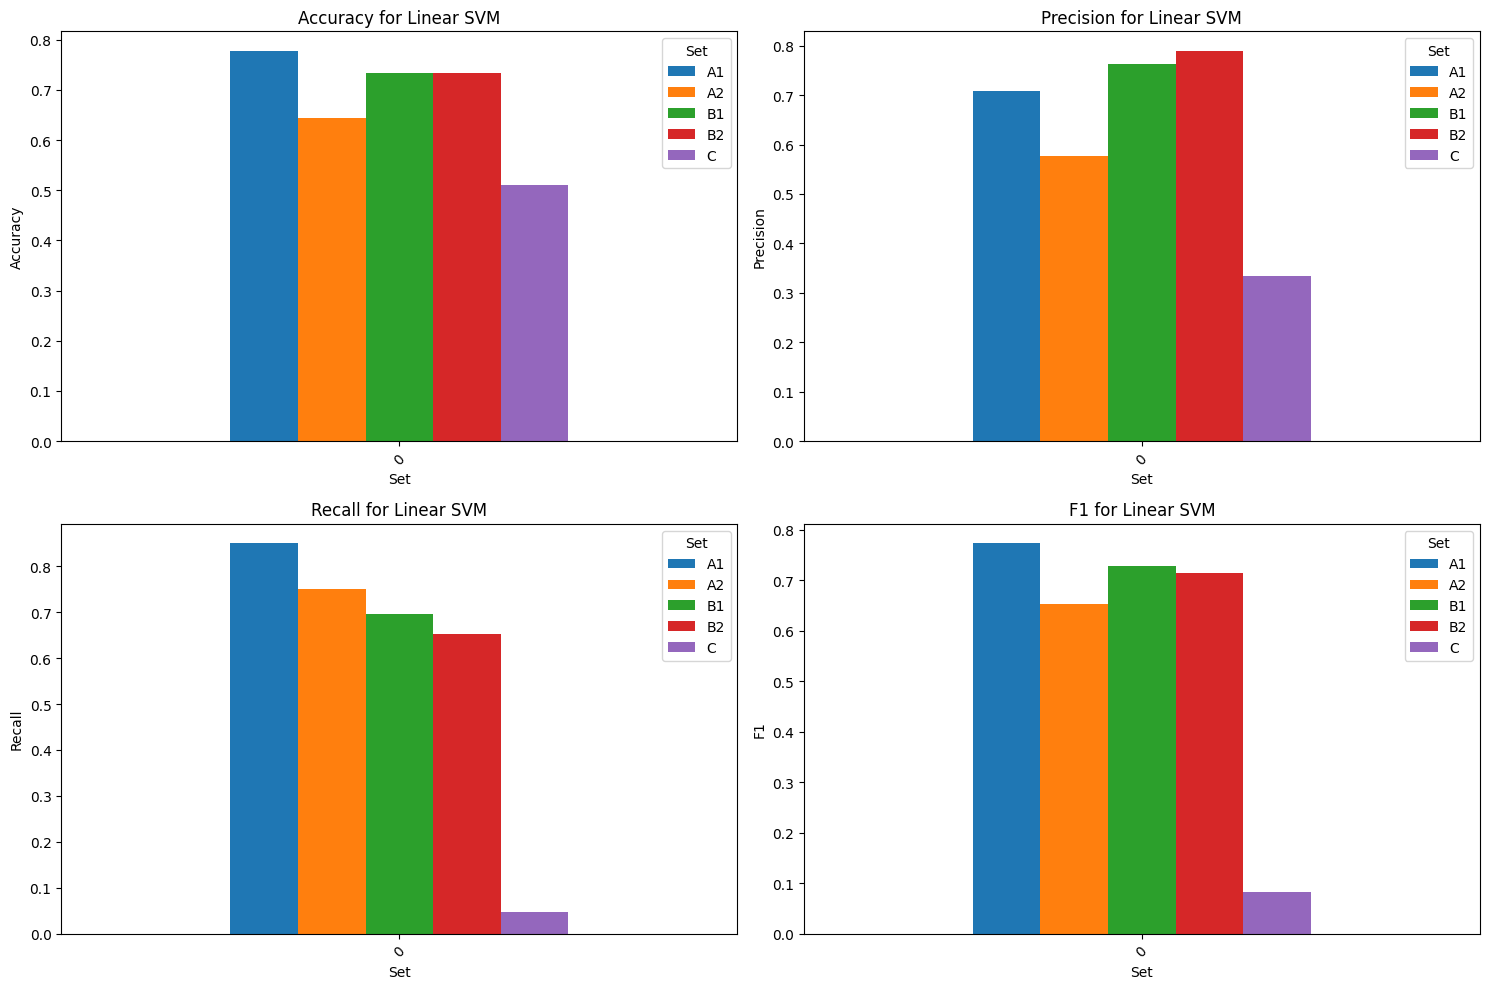

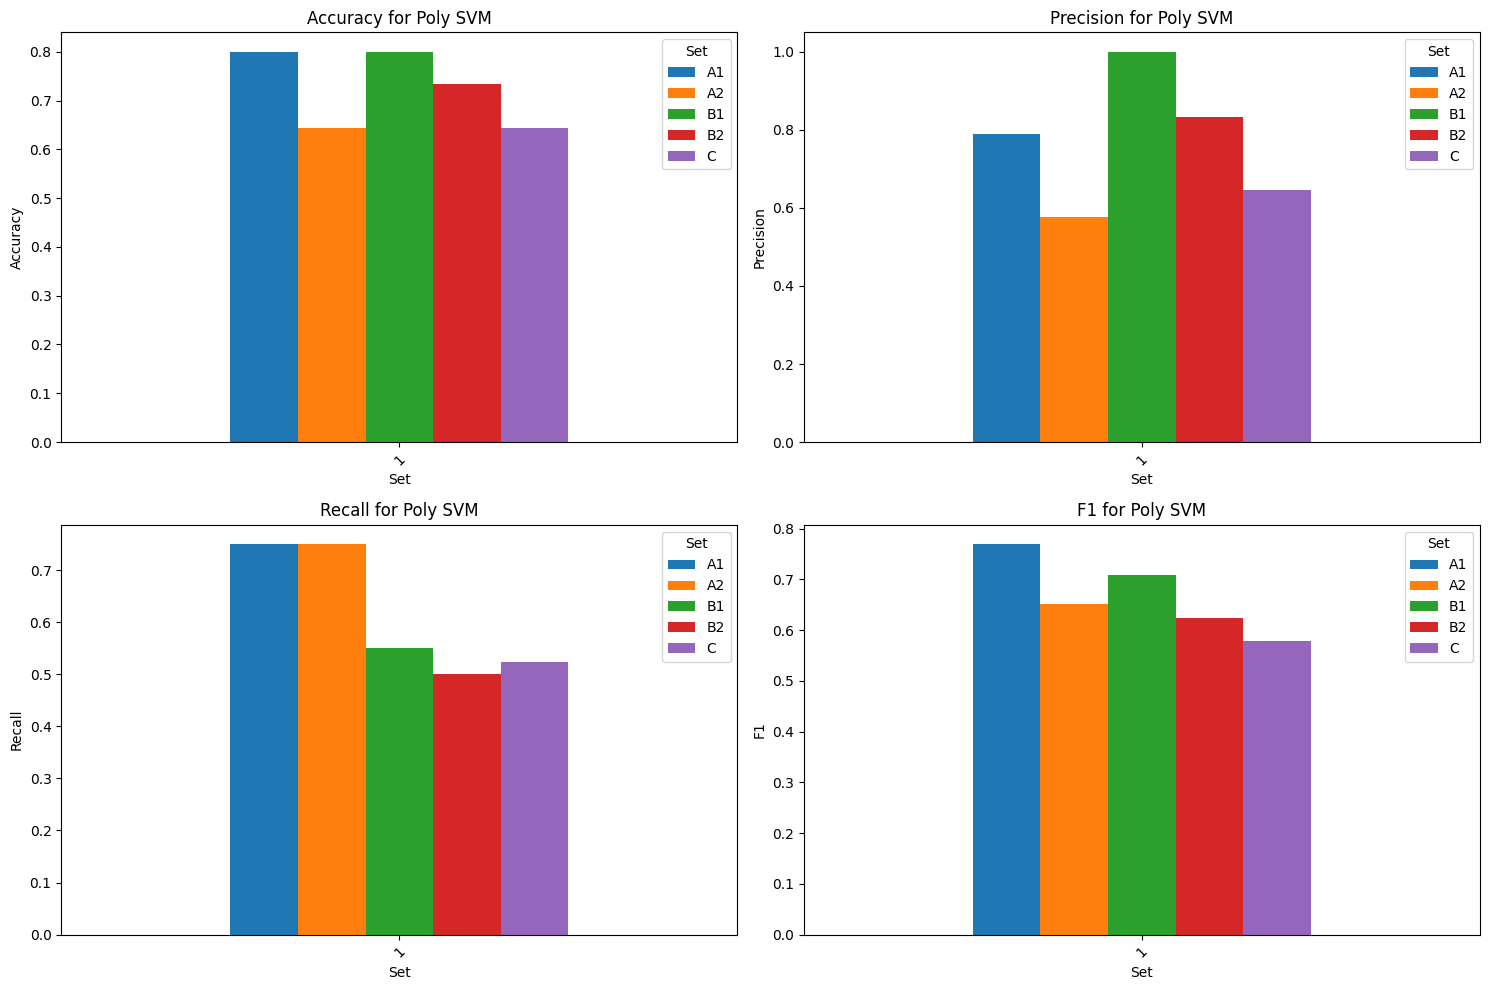

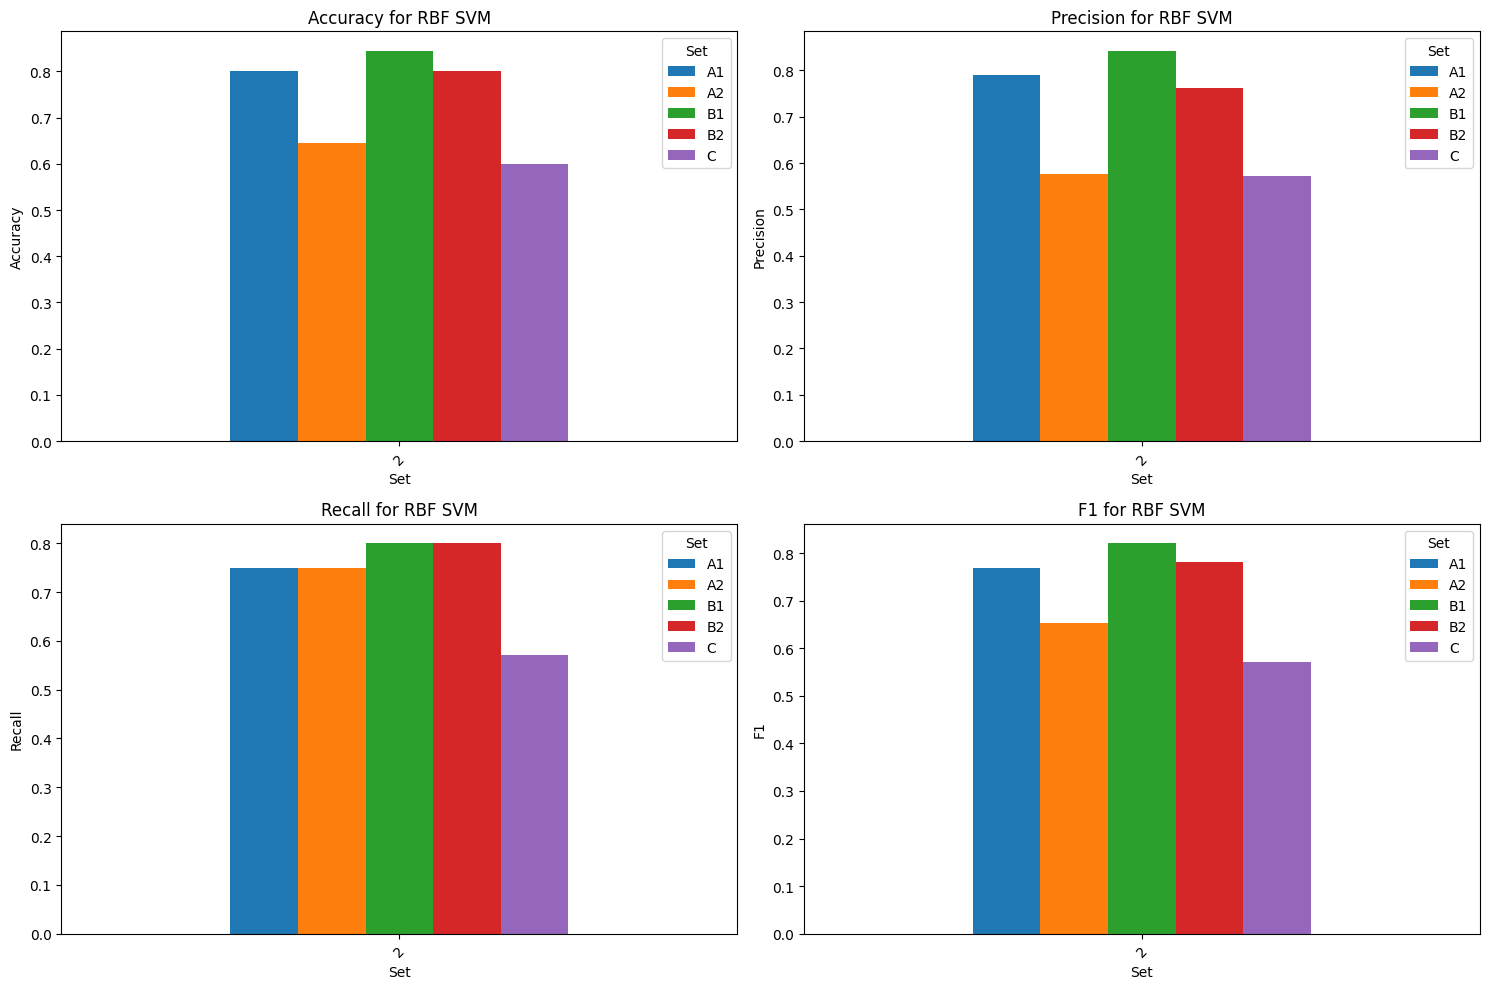

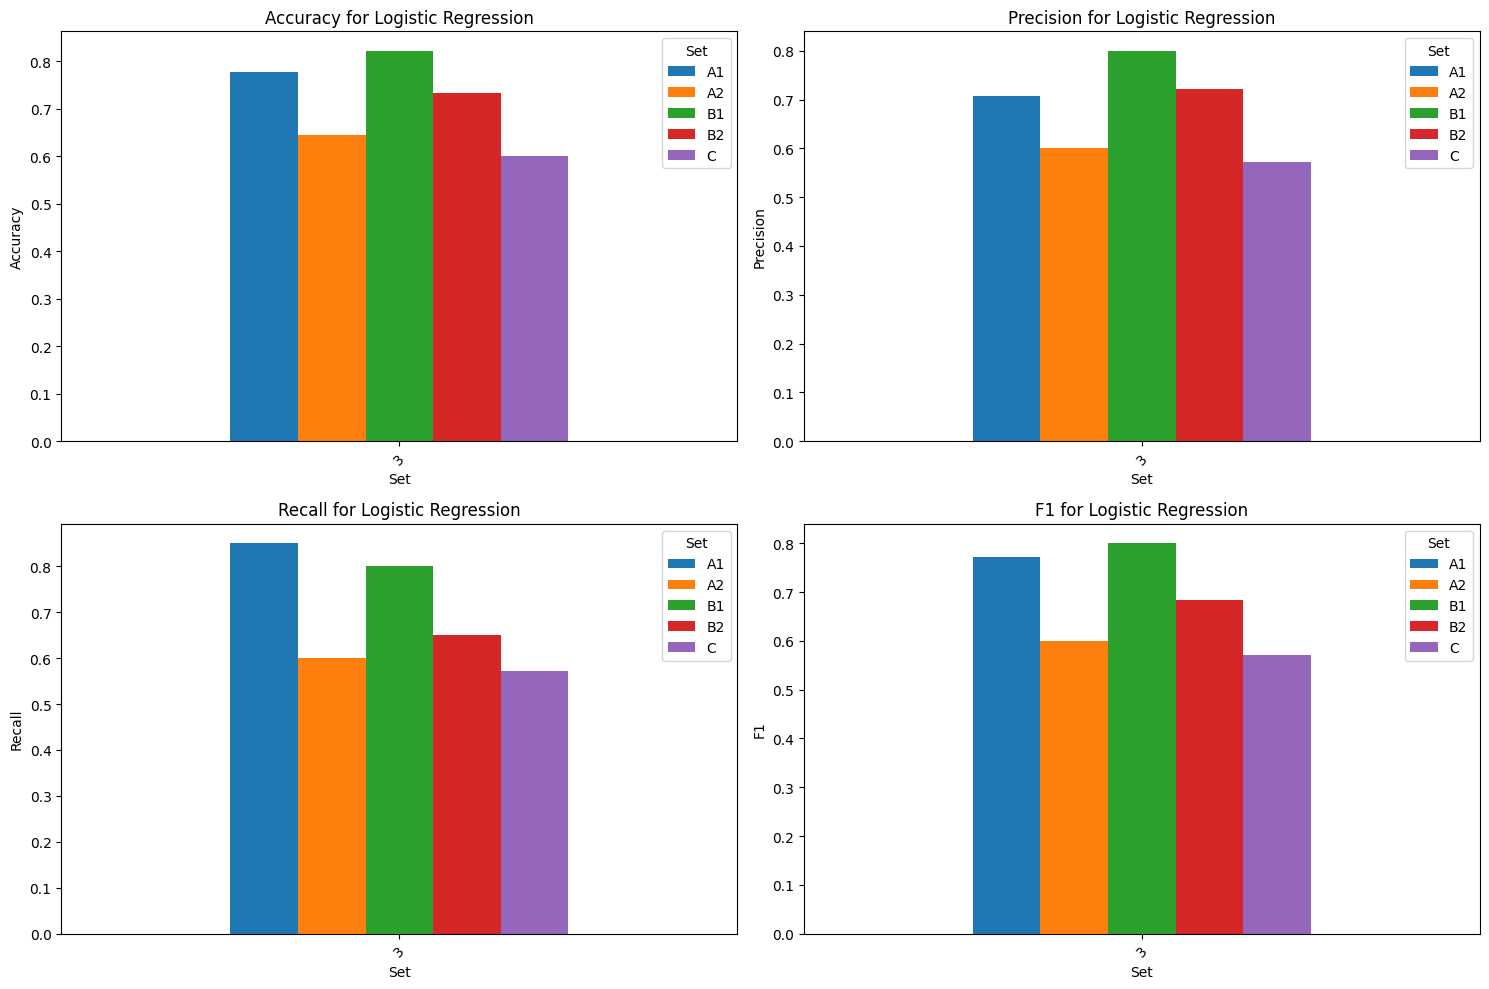

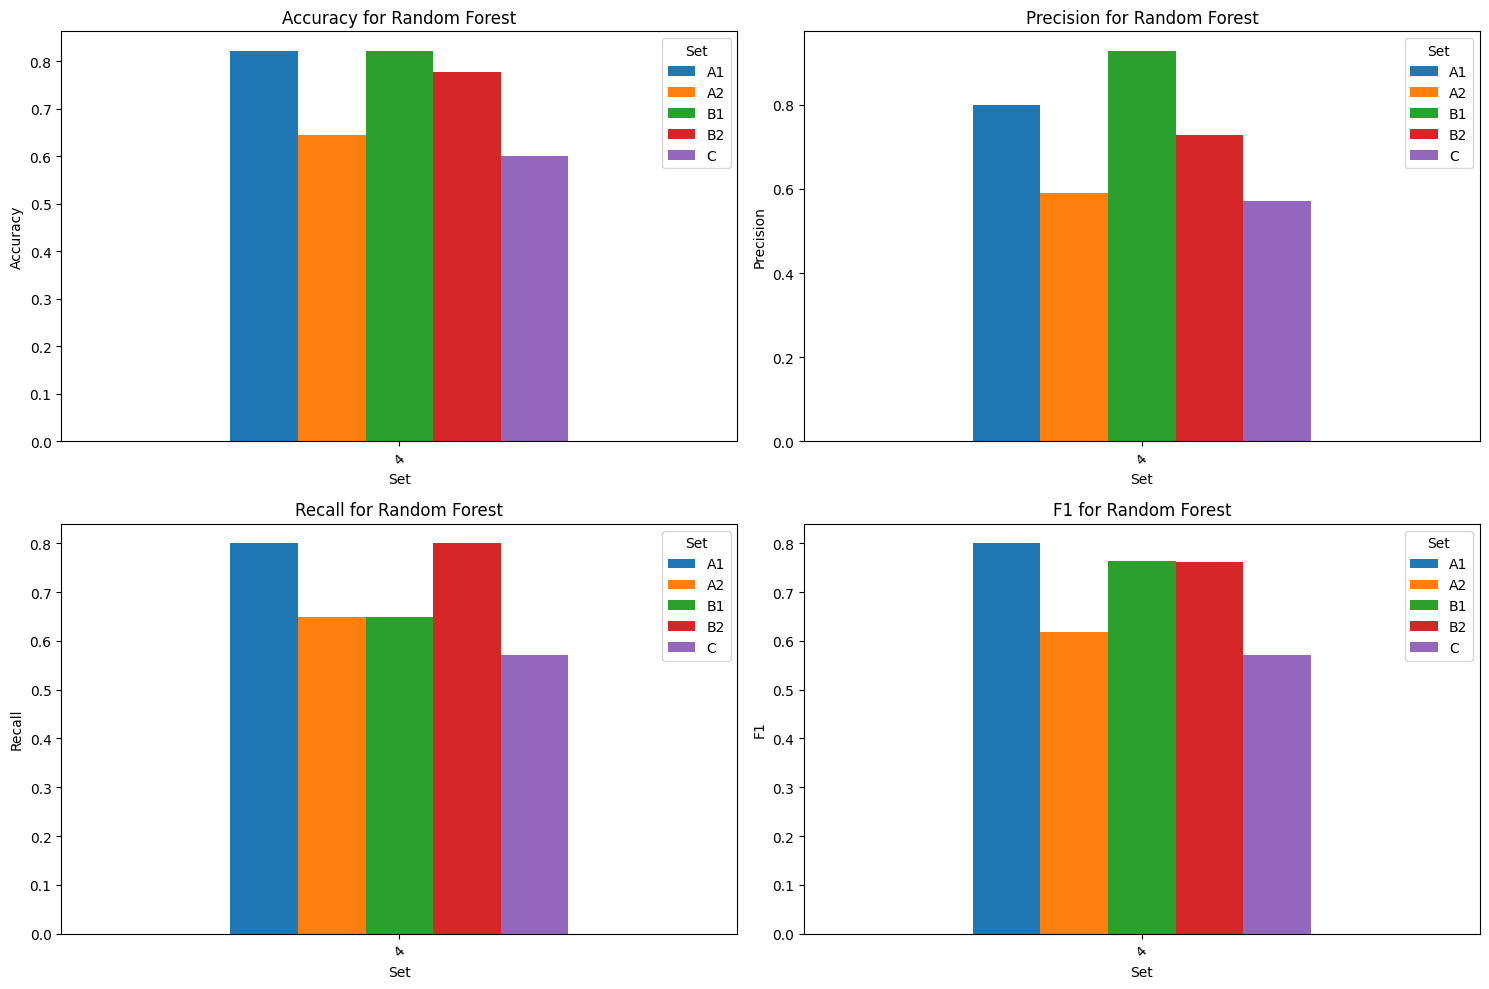

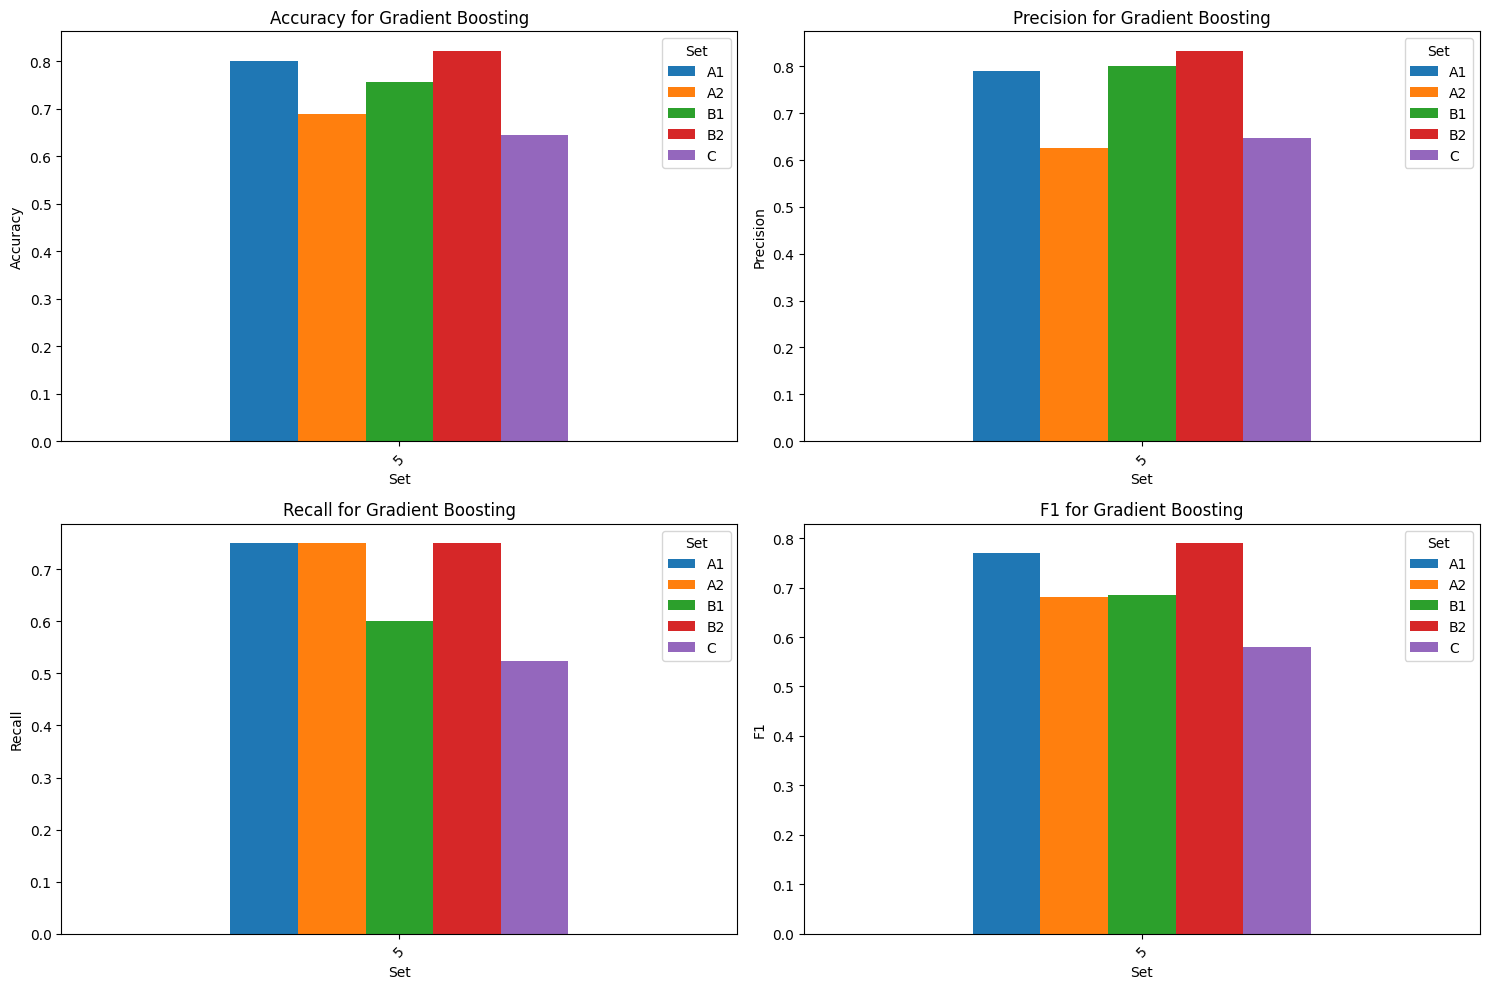

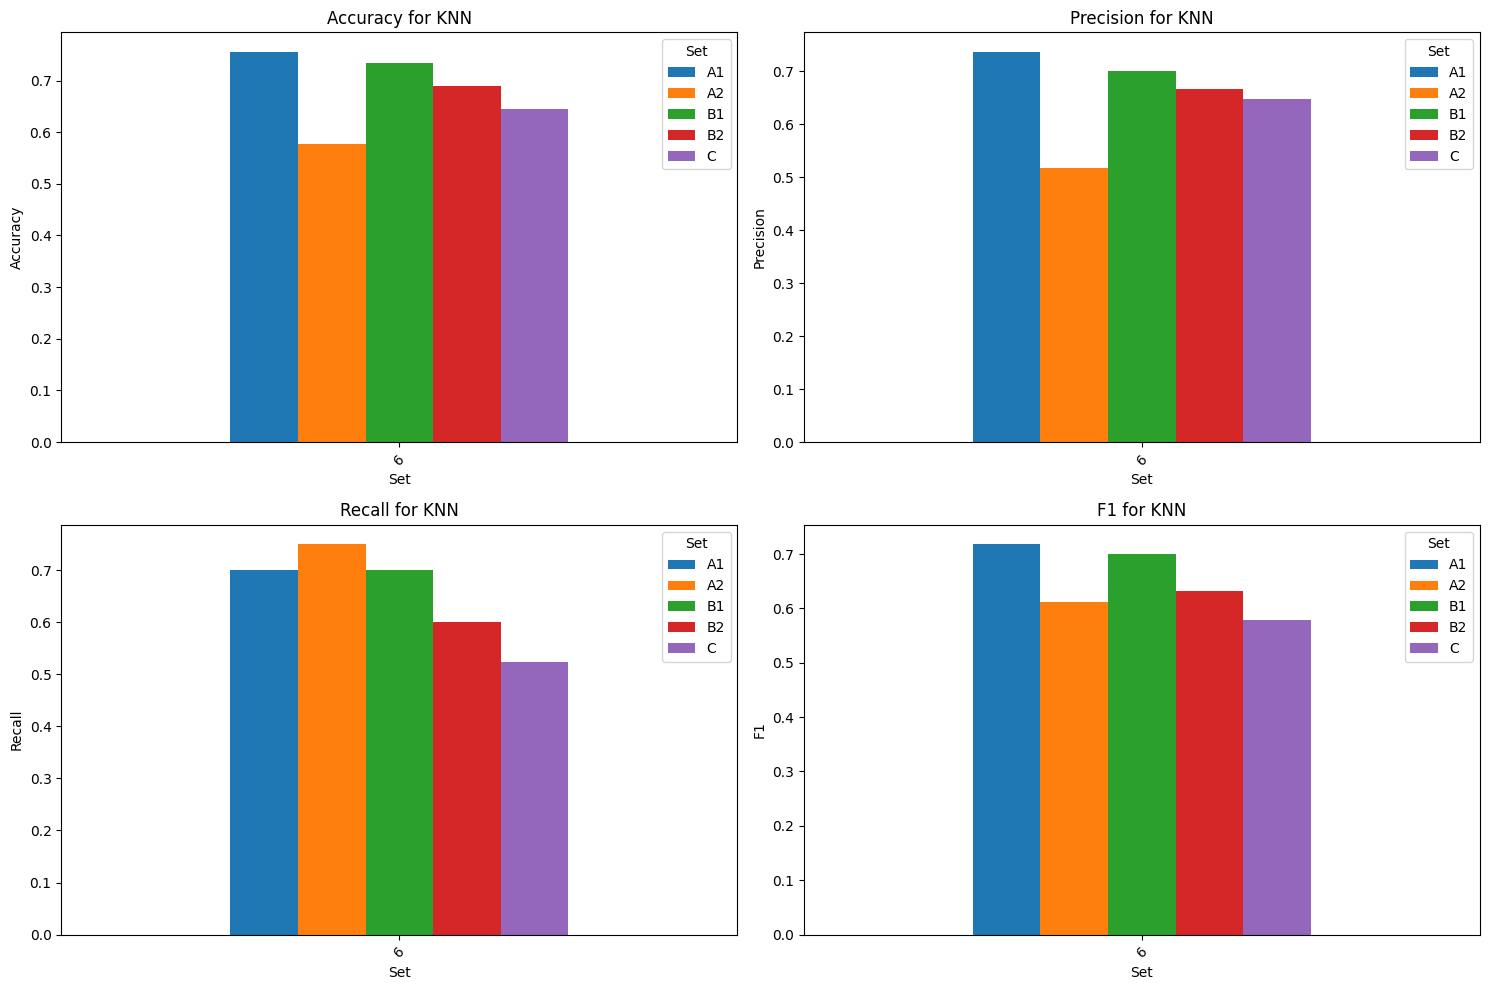

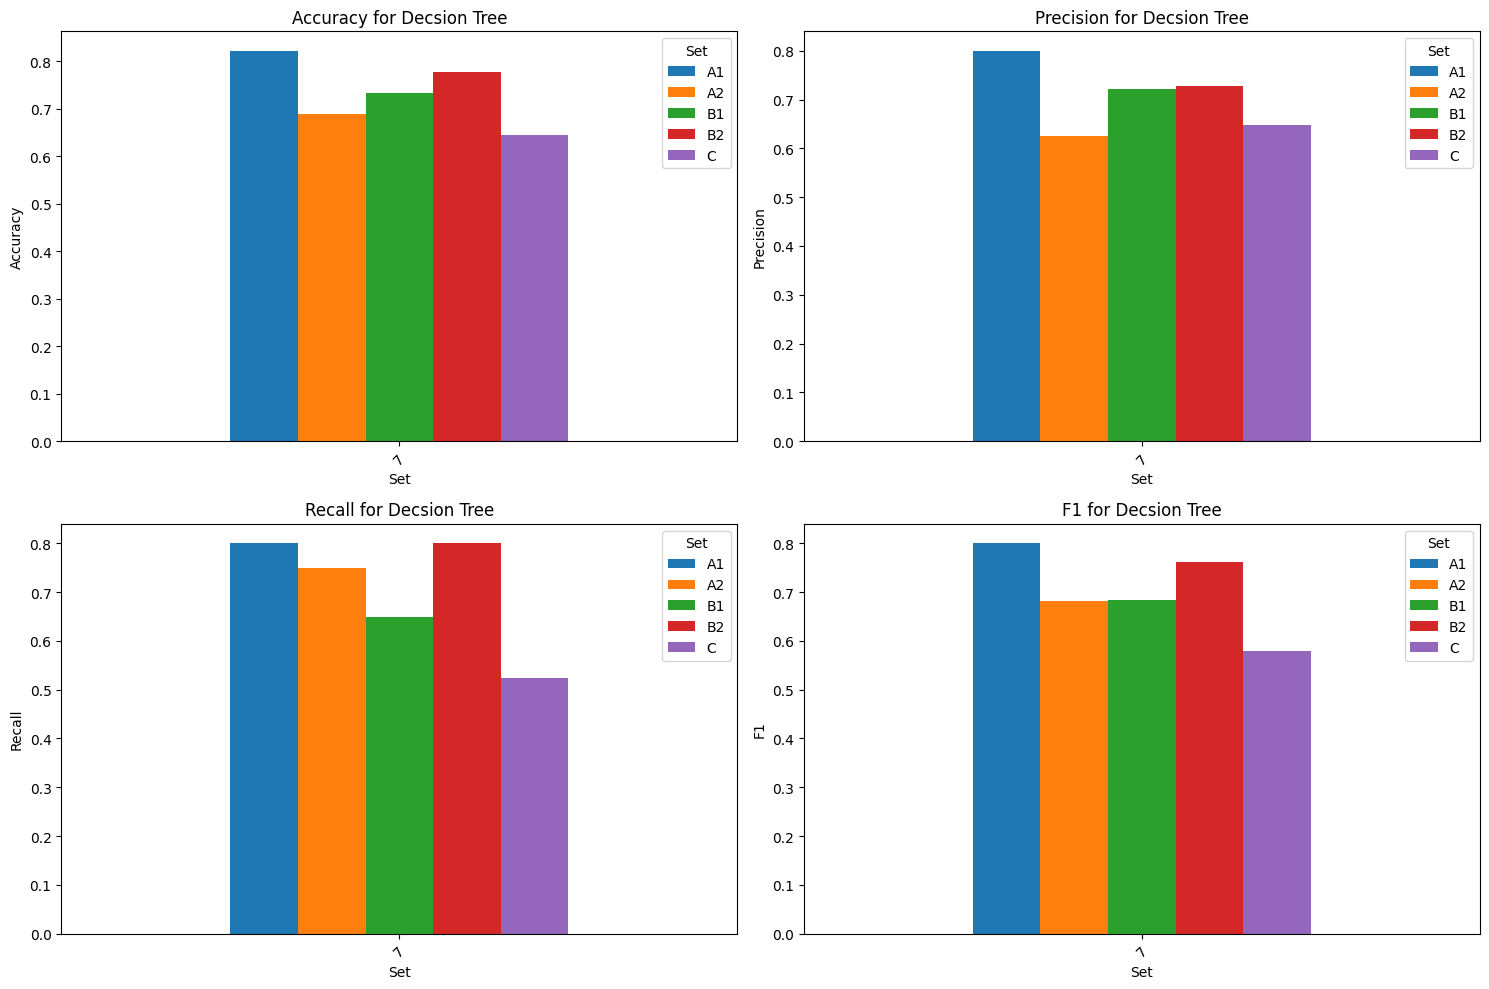

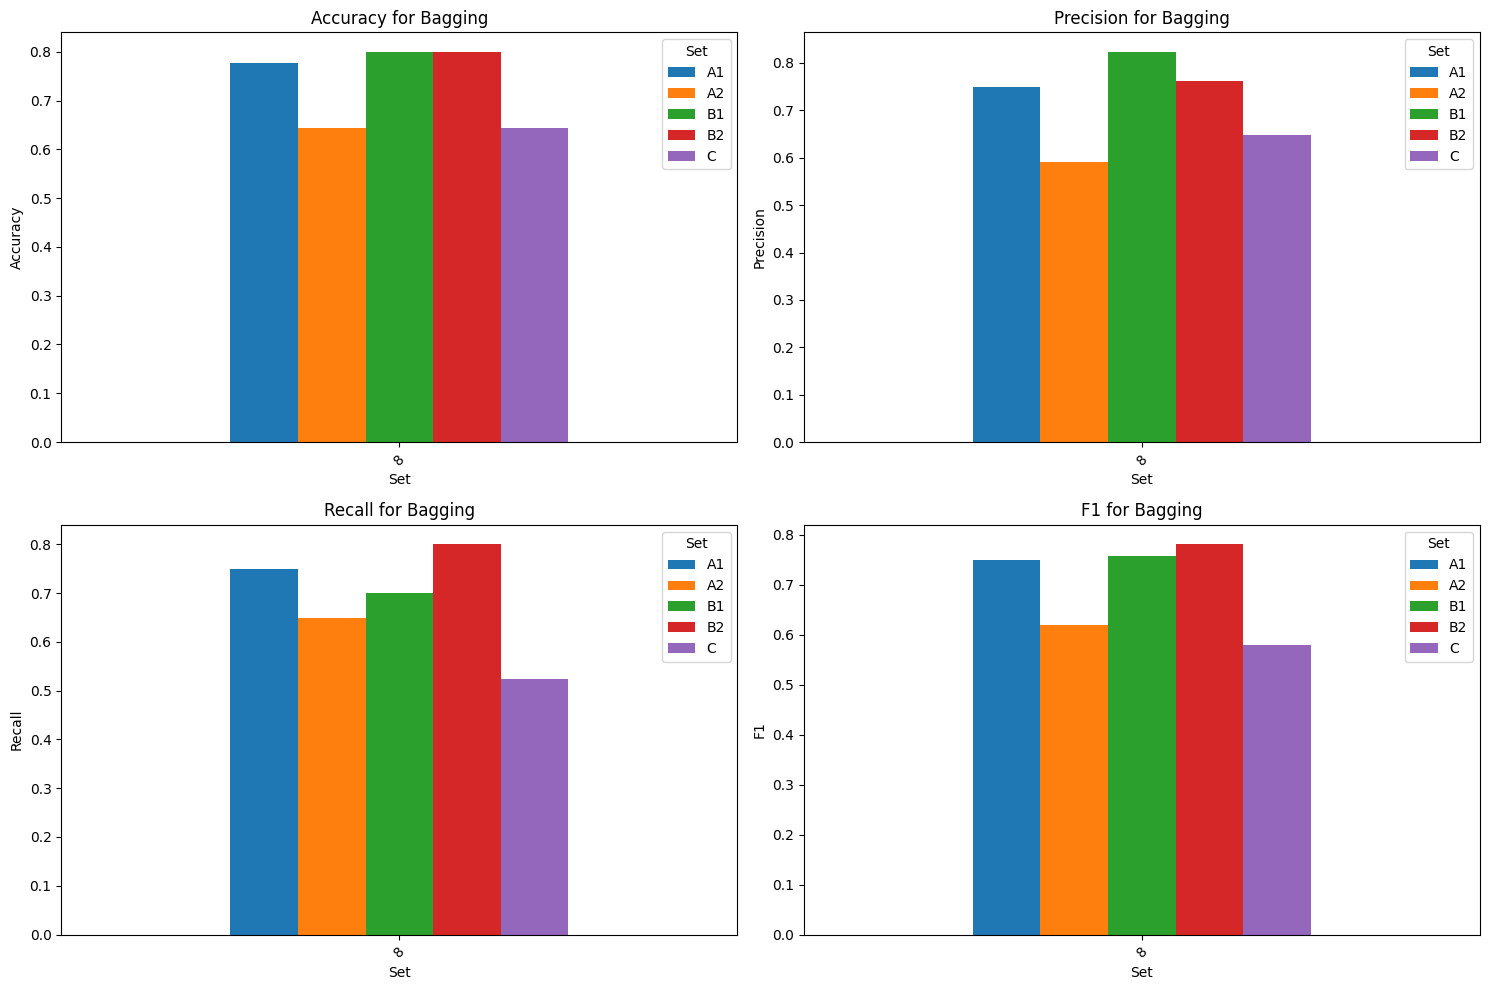

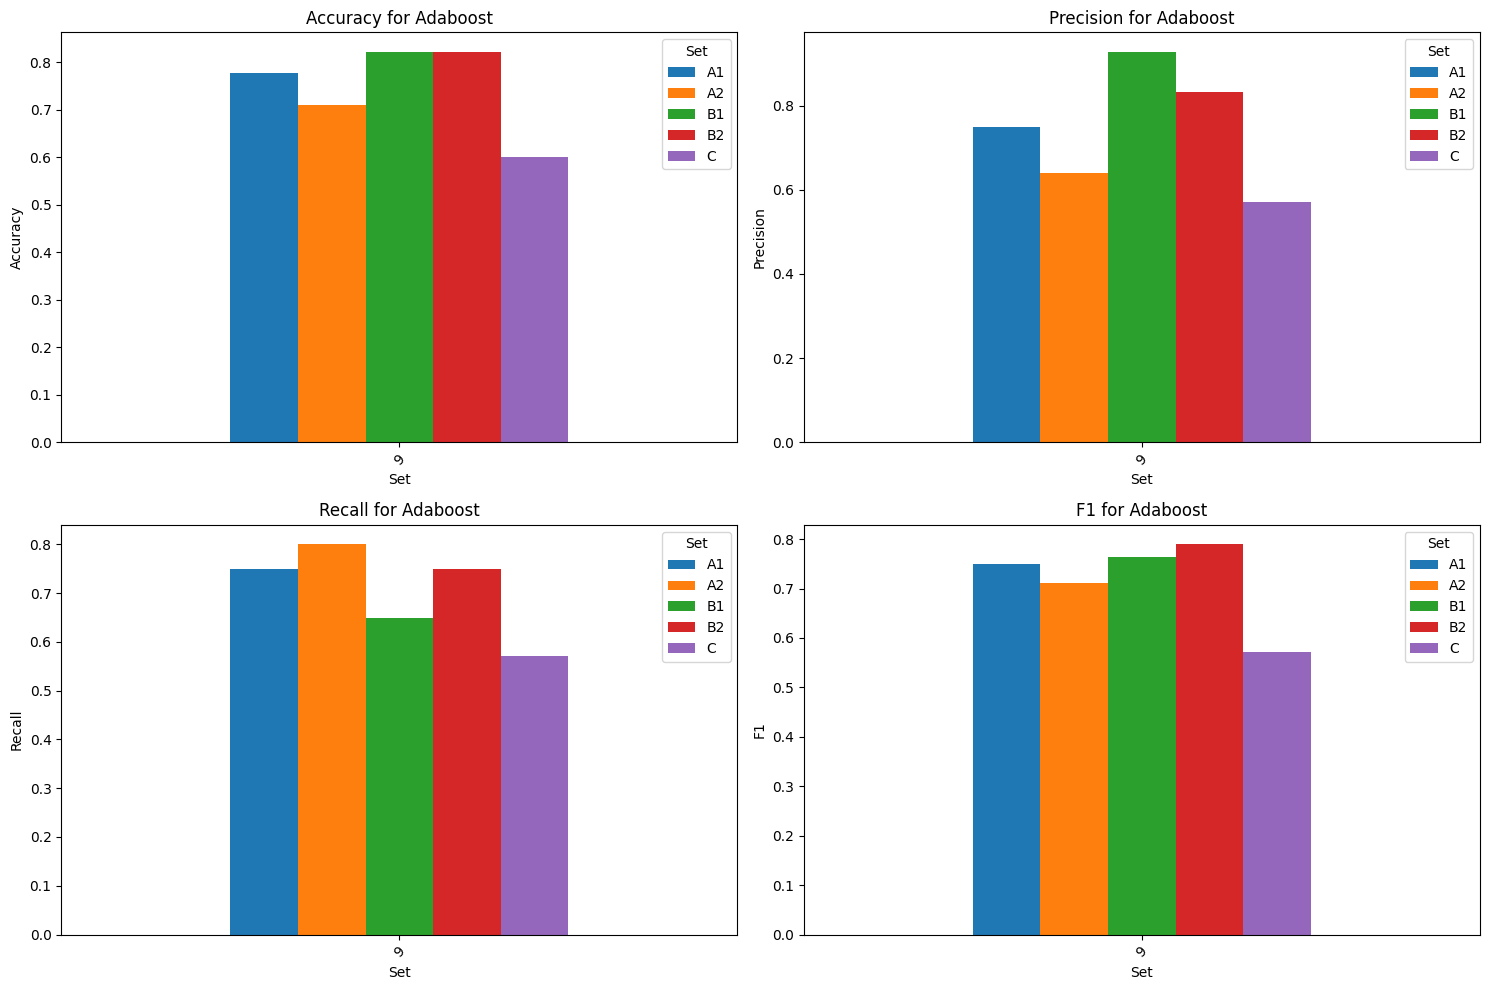

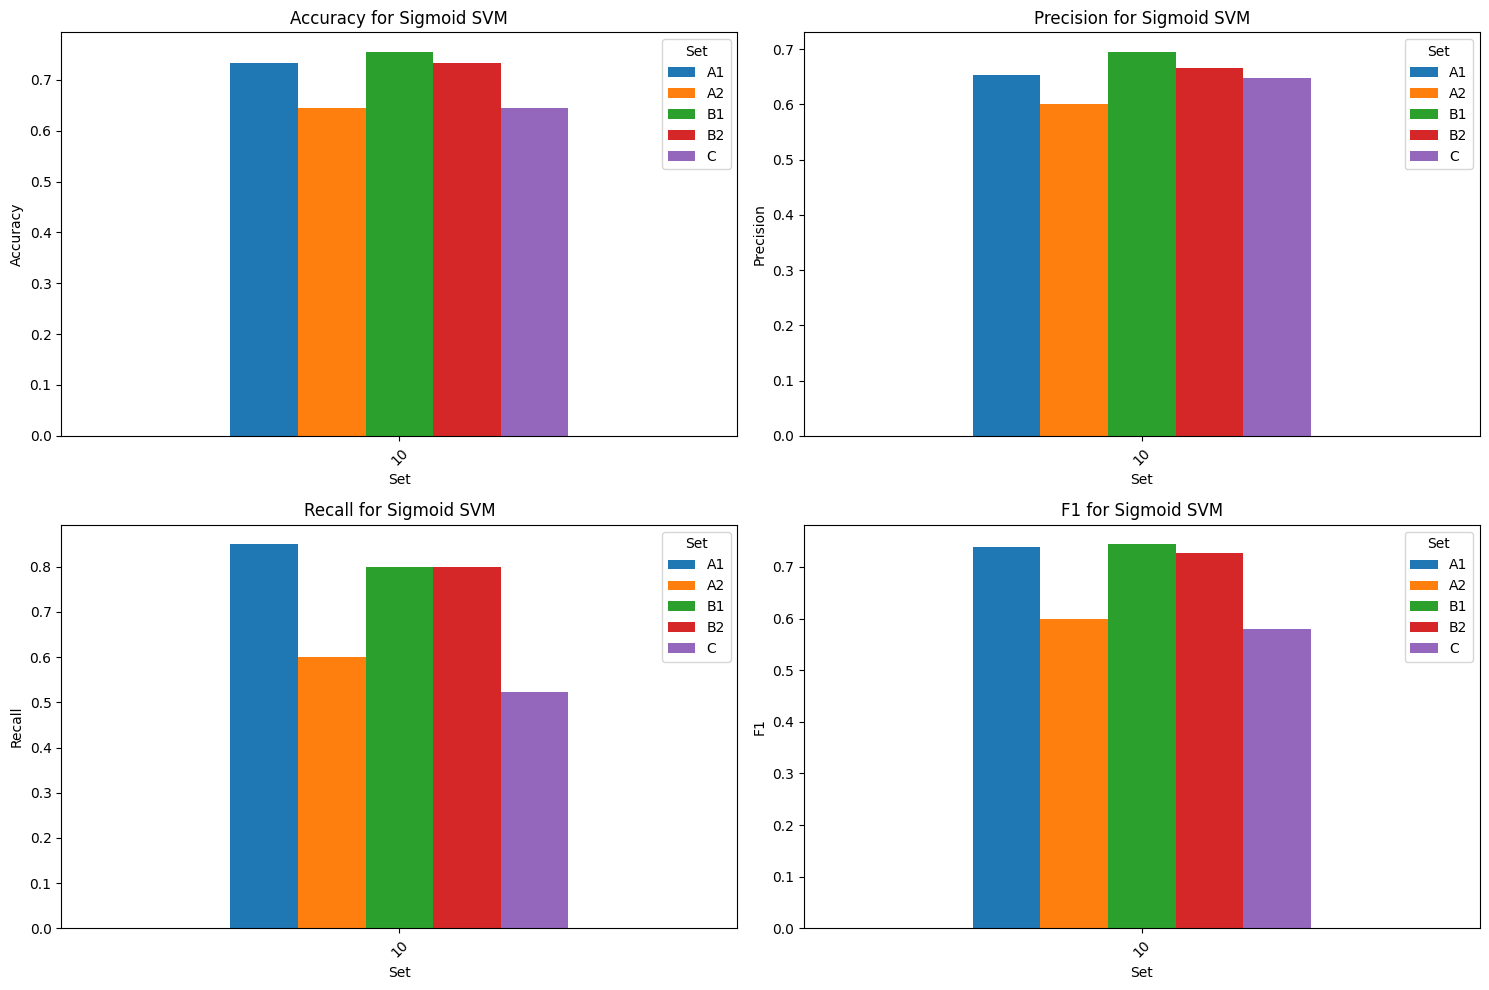

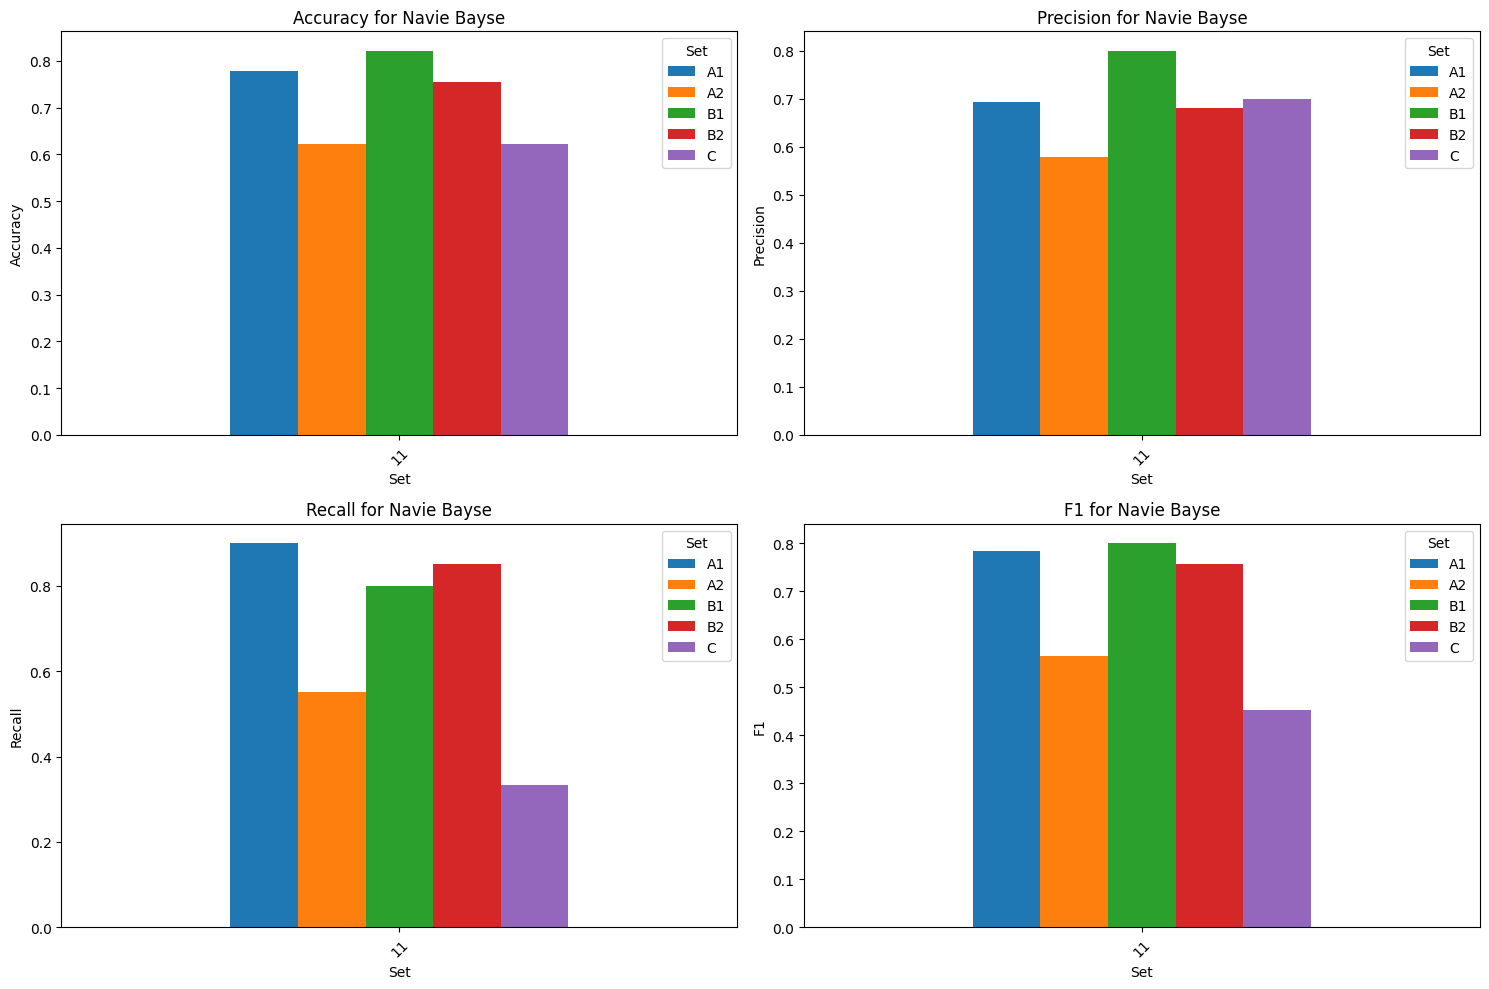

In [7]:
import matplotlib.pyplot as plt

# List of models
models = [
    'Linear SVM', 'Poly SVM', 'RBF SVM', 'Logistic Regression',
    'Random Forest', 'Gradient Boosting', 'KNN', 'Decsion Tree',
    'Bagging', 'Adaboost', 'Sigmoid SVM', 'Navie Bayse'
]

# Create subplots for each model
for model in models:
    # Filter data for the current model
    model_data = merged_df[merged_df['Model'] == model]
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Plotting each metric
    for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1']):
        row = i // 2
        col = i % 2
        
        # Plot data for the current metric
        model_data[['{}{}'.format(metric, set_label) for set_label in ['A1', 'A2', 'B1', 'B2', 'C']]].plot(kind='bar', ax=axes[row, col], rot=45)
        axes[row, col].set_title(f'{metric} for {model}')
        axes[row, col].set_xlabel('Set')
        axes[row, col].set_ylabel(metric)
        axes[row, col].legend(['A1', 'A2', 'B1', 'B2', 'C'], title='Set')

    plt.tight_layout()
    plt.show()


In [8]:
merged_df.columns

Index(['Model', 'AccuracyA1', 'PrecisionA1', 'RecallA1', 'F1A1', 'AccuracyA2',
       'PrecisionA2', 'RecallA2', 'F1A2', 'AccuracyB1', 'PrecisionB1',
       'RecallB1', 'F1B1', 'AccuracyB2', 'PrecisionB2', 'RecallB2', 'F1B2',
       'AccuracyC', 'PrecisionC', 'RecallC', 'F1C', 'AccuracyD', 'PrecisionD',
       'RecallD', 'F1D'],
      dtype='object')

In [18]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming merged_df is your DataFrame containing the metrics for models trained on datasets A1 and B1
# Replace 'AccuracyA1', 'PrecisionA1', 'RecallA1', and 'F1A1' with the corresponding column names in your DataFrame

# Extract the metrics for dataset A1
accA1 = merged_df['AccuracyA1']
precA1 = merged_df['PrecisionA1']
recA1 = merged_df['RecallA1']
f1A1 = merged_df['F1A1']

# Extract the metrics for dataset B1
accB1 = merged_df['AccuracyB1']
precB1 = merged_df['PrecisionB1']
recB1 = merged_df['RecallB1']
f1B1 = merged_df['F1B1']

# Perform t-tests for each metric
t_stat_acc, p_value_acc = ttest_ind(accA1, accB1, equal_var=False)
t_stat_prec, p_value_prec = ttest_ind(precA1, precB1, equal_var=False)
t_stat_rec, p_value_rec = ttest_ind(recA1, recB1, equal_var=False)
t_stat_f1, p_value_f1 = ttest_ind(f1A1, f1B1, equal_var=False)

# Print the results
print("Accuracy:")
print("T-Statistic:", t_stat_acc)
print("P-Value:", p_value_acc)
print()

print("Precision:")
print("T-Statistic:", t_stat_prec)
print("P-Value:", p_value_prec)
print()

print("Recall:")
print("T-Statistic:", t_stat_rec)
print("P-Value:", p_value_rec)
print()

print("F1 Score:")
print("T-Statistic:", t_stat_f1)
print("P-Value:", p_value_f1)


Accuracy:
T-Statistic: -0.13079491384139205
P-Value: 0.8973677693549366

Precision:
T-Statistic: -2.2492914267611512
P-Value: 0.03864196998535057

Recall:
T-Statistic: 3.062687111148757
P-Value: 0.006221497256419622

F1 Score:
T-Statistic: 1.3062645056949391
P-Value: 0.2094022529401889


In [19]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Assuming merged_df is your DataFrame containing the metrics for models trained on datasets A1 and B1
# Replace 'AccuracyA1', 'PrecisionA1', 'RecallA1', and 'F1A1' with the corresponding column names in your DataFrame

# Extract the metrics for dataset A1
accA1 = merged_df['AccuracyA1']
precA1 = merged_df['PrecisionA1']
recA1 = merged_df['RecallA1']
f1A1 = merged_df['F1A1']

# Extract the metrics for dataset B1
accB1 = merged_df['AccuracyB1']
precB1 = merged_df['PrecisionB1']
recB1 = merged_df['RecallB1']
f1B1 = merged_df['F1B1']

# Perform Mann-Whitney U test for each metric
u_stat_acc, p_value_acc = mannwhitneyu(accA1, accB1, alternative='greater')
u_stat_prec, p_value_prec = mannwhitneyu(precA1, precB1, alternative='greater')
u_stat_rec, p_value_rec = mannwhitneyu(recA1, recB1, alternative='greater')
u_stat_f1, p_value_f1 = mannwhitneyu(f1A1, f1B1, alternative='greater')

# Print the results
print("Accuracy:")
print("U-Statistic:", u_stat_acc)
print("P-Value:", p_value_acc)
print()

print("Precision:")
print("U-Statistic:", u_stat_prec)
print("P-Value:", p_value_prec)
print()

print("Recall:")
print("U-Statistic:", u_stat_rec)
print("P-Value:", p_value_rec)
print()

print("F1 Score:")
print("U-Statistic:", u_stat_f1)
print("P-Value:", p_value_f1)


Accuracy:
U-Statistic: 66.5
P-Value: 0.6380732681071793

Precision:
U-Statistic: 36.0
P-Value: 0.982988861368817

Recall:
U-Statistic: 115.0
P-Value: 0.006382157709812601

F1 Score:
U-Statistic: 95.0
P-Value: 0.09613969240693387


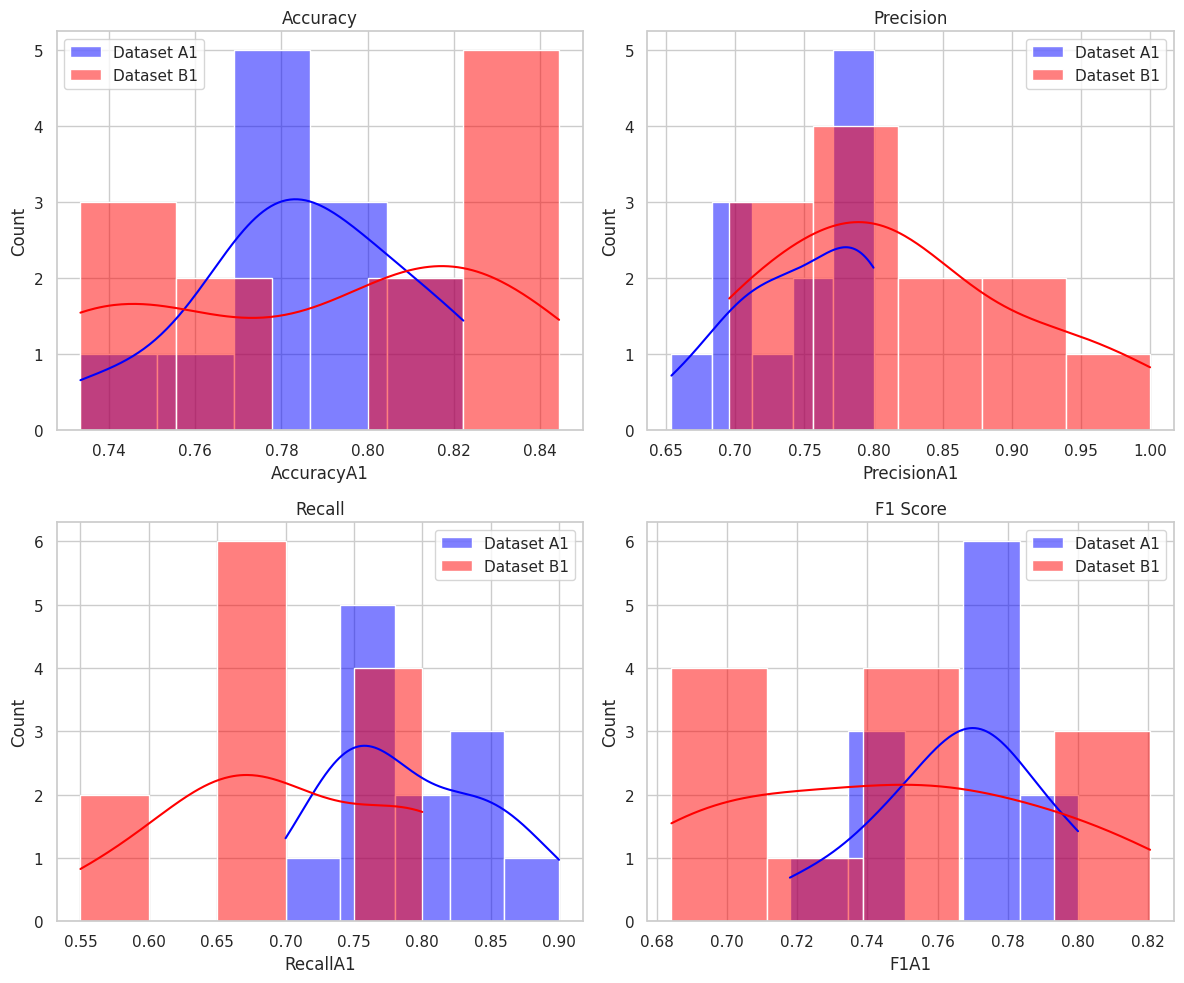

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set(style="whitegrid")

# Create subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot overlapping distributions for Accuracy
sns.histplot(ax=axes[0, 0], data=merged_df, x='AccuracyA1', color='blue', label='Dataset A1', kde=True)
sns.histplot(ax=axes[0, 0], data=merged_df, x='AccuracyB1', color='red', label='Dataset B1', kde=True)
axes[0, 0].legend()
axes[0, 0].set_title('Accuracy')

# Plot overlapping distributions for Precision
sns.histplot(ax=axes[0, 1], data=merged_df, x='PrecisionA1', color='blue', label='Dataset A1', kde=True)
sns.histplot(ax=axes[0, 1], data=merged_df, x='PrecisionB1', color='red', label='Dataset B1', kde=True)
axes[0, 1].legend()
axes[0, 1].set_title('Precision')

# Plot overlapping distributions for Recall
sns.histplot(ax=axes[1, 0], data=merged_df, x='RecallA1', color='blue', label='Dataset A1', kde=True)
sns.histplot(ax=axes[1, 0], data=merged_df, x='RecallB1', color='red', label='Dataset B1', kde=True)
axes[1, 0].legend()
axes[1, 0].set_title('Recall')

# Plot overlapping distributions for F1 Score
sns.histplot(ax=axes[1, 1], data=merged_df, x='F1A1', color='blue', label='Dataset A1', kde=True)
sns.histplot(ax=axes[1, 1], data=merged_df, x='F1B1', color='red', label='Dataset B1', kde=True)
axes[1, 1].legend()
axes[1, 1].set_title('F1 Score')

# Show the plot
plt.tight_layout()
plt.show()


In [12]:
merged_df

,Model,AccuracyA1,PrecisionA1,RecallA1,F1A1,AccuracyA2,PrecisionA2,RecallA2,F1A2,AccuracyB1,...,RecallB2,F1B2,AccuracyC,PrecisionC,RecallC,F1C,AccuracyD,PrecisionD,RecallD,F1D
0,Linear SVM,0.777778,0.708333,0.85,0.772727,0.644444,0.576923,0.75,0.652174,0.733333,...,0.652174,0.714286,0.511111,0.333333,0.047619,0.083333,0.600000,0.437500,0.437500,0.437500
1,Poly SVM,0.800000,0.789474,0.75,0.769231,0.644444,0.576923,0.75,0.652174,0.800000,...,0.500000,0.625000,0.644444,0.647059,0.523810,0.578947,0.622222,0.750000,0.157895,0.260870
2,RBF SVM,0.800000,0.789474,0.75,0.769231,0.644444,0.576923,0.75,0.652174,0.844444,...,0.800000,0.780488,0.600000,0.571429,0.571429,0.571429,0.688889,0.727273,0.421053,0.533333
3,Logistic Regression,0.777778,0.708333,0.85,0.772727,0.644444,0.600000,0.60,0.600000,0.822222,...,0.650000,0.684211,0.600000,0.571429,0.571429,0.571429,0.577778,0.500000,0.526316,0.512821
4,Random Forest,0.822222,0.800000,0.80,0.800000,0.644444,0.590909,0.65,0.619048,0.822222,...,0.800000,0.761905,0.600000,0.571429,0.571429,0.571429,0.644444,0.578947,0.578947,0.578947
5,Gradient Boosting,0.800000,0.789474,0.75,0.769231,0.688889,0.625000,0.75,0.681818,0.755556,...,0.750000,0.789474,0.644444,0.647059,0.523810,0.578947,0.644444,0.588235,0.526316,0.555556
6,KNN,0.755556,0.736842,0.70,0.717949,0.577778,0.517241,0.75,0.612245,0.733333,...,0.600000,0.631579,0.644444,0.647059,0.523810,0.578947,0.577778,0.500000,0.421053,0.457143
7,Decsion Tree,0.822222,0.800000,0.80,0.800000,0.688889,0.625000,0.75,0.681818,0.733333,...,0.800000,0.761905,0.644444,0.647059,0.523810,0.578947,0.666667,0.611111,0.578947,0.594595
8,Bagging,0.777778,0.750000,0.75,0.750000,0.644444,0.590909,0.65,0.619048,0.800000,...,0.800000,0.780488,0.644444,0.647059,0.523810,0.578947,0.666667,0.611111,0.578947,0.594595
9,Adaboost,0.777778,0.750000,0.75,0.750000,0.711111,0.640000,0.80,0.711111,0.822222,...,0.750000,0.789474,0.600000,0.571429,0.571429,0.571429,0.644444,0.571429,0.631579,0.600000


In [13]:
import pandas as pd
from itertools import combinations
from scipy.stats import ttest_rel

specific_rows = {
    'Accuracy': ['AccuracyA1', 'AccuracyA2', 'AccuracyB1', 'AccuracyB2', 'AccuracyC', 'AccuracyD'],
    'Precision': ['PrecisionA1', 'PrecisionA2', 'PrecisionB1', 'PrecisionB2', 'PrecisionC', 'PrecisionD'],
    'Recall': ['RecallA1', 'RecallA2', 'RecallB1', 'RecallB2', 'RecallC', 'RecallD'],
    'F1': ['F1A1', 'F1A2', 'F1B1', 'F1B2', 'F1C', 'F1D']
}

results = []
for metric, columns in specific_rows.items():
    # Iterate over the 'Model' column combinations
    for i in range(len(merged_df['Model'])):
        for j in range(i+1, len(merged_df['Model'])):
            model1 = merged_df['Model'][i]
            model2 = merged_df['Model'][j]
            # Extract the corresponding metric values for the two models
            values1 = [merged_df[col][i] for col in columns]
            values2 = [merged_df[col][j] for col in columns]
            # Perform the T-test
            t_stat, p_value = ttest_rel(values1, values2)
            # Determine significance based on 1% significance level
            is_significant = p_value < 0.01
            # Append the results to the list
            results.append({
                'Metric': metric,
                'Model1': model1,
                'Model2': model2,
                'T-statistic': t_stat,
                'p-value': p_value,
                'Significant (1%)': is_significant
            })

results_df = pd.DataFrame(results)

for metric, columns in specific_rows.items():
    p_value_matrix = results_df[results_df['Metric'] == metric].pivot_table(index='Model1', columns='Model2', values='p-value')
    print(f"{metric} p-value matrix:")
    print(p_value_matrix)
    p_value_matrix.to_csv(f'TestB_{metric}_matrix.csv')

Accuracy p-value matrix:
Model2               Adaboost   Bagging  Decsion Tree  Gradient Boosting  \
Model1                                                                     
Adaboost                  NaN       NaN           NaN                NaN   
Bagging              0.660642       NaN           NaN                NaN   
Decsion Tree         0.749731  1.000000           NaN                NaN   
Gradient Boosting    0.822044  0.792613      0.741154                NaN   
KNN                  0.063817  0.017133      0.029291                NaN   
Linear SVM           0.007485  0.042194      0.026827           0.020966   
Logistic Regression  0.079830  0.157623      0.285591           0.190776   
Poly SVM             0.331827  0.327582      0.444113           0.363217   
RBF SVM              1.000000  0.576132      0.771112           0.871671   
Random Forest        0.517672  0.792613      0.861849           0.708934   
Sigmoid SVM               NaN       NaN           NaN          

In [14]:
import pandas as pd
from itertools import combinations
from scipy.stats import ttest_rel

specific_rows = {
    'Accuracy': ['AccuracyA1', 'AccuracyA2', 'AccuracyB1', 'AccuracyB2', 'AccuracyC', 'AccuracyD'],
    'Precision': ['PrecisionA1', 'PrecisionA2', 'PrecisionB1', 'PrecisionB2', 'PrecisionC', 'PrecisionD'],
    'Recall': ['RecallA1', 'RecallA2', 'RecallB1', 'RecallB2', 'RecallC', 'RecallD'],
    'F1': ['F1A1', 'F1A2', 'F1B1', 'F1B2', 'F1C', 'F1D']
}

results = []
for metric, columns in specific_rows.items():
    # Iterate over the 'Model' column combinations
    for i in range(len(merged_df['Model'])):
        for j in range(i+1, len(merged_df['Model'])):
            model1 = merged_df['Model'][i]
            model2 = merged_df['Model'][j]
            # Extract the corresponding metric values for the two models
            values1 = [merged_df[col][i] for col in columns]
            values2 = [merged_df[col][j] for col in columns]
            # Perform the T-test
            t_stat, p_value = ttest_rel(values1, values2)
            # Determine significance based on 1% significance level
            is_significant = p_value < 0.01
            # Append the results to the list
            results.append({
                'Metric': metric,
                'Model1': model1,
                'Model2': model2,
                'T-statistic': t_stat,
                'p-value': p_value,
                'Significant (1%)': is_significant
            })

results_df = pd.DataFrame(results)

# Create separate p-value matrices for each metric
for metric, group in results_df.groupby('Metric'):
  p_value_matrix = group.pivot_table(index='Model1', columns='Model2', values='p-value')
  print(f"{metric} p-value matrix:")
  print(p_value_matrix)
  p_value_matrix.to_csv(f'TestB_{metric}_matrix.csv')


Accuracy p-value matrix:
Model2               Adaboost   Bagging  Decsion Tree  Gradient Boosting  \
Model1                                                                     
Adaboost                  NaN       NaN           NaN                NaN   
Bagging              0.660642       NaN           NaN                NaN   
Decsion Tree         0.749731  1.000000           NaN                NaN   
Gradient Boosting    0.822044  0.792613      0.741154                NaN   
KNN                  0.063817  0.017133      0.029291                NaN   
Linear SVM           0.007485  0.042194      0.026827           0.020966   
Logistic Regression  0.079830  0.157623      0.285591           0.190776   
Poly SVM             0.331827  0.327582      0.444113           0.363217   
RBF SVM              1.000000  0.576132      0.771112           0.871671   
Random Forest        0.517672  0.792613      0.861849           0.708934   
Sigmoid SVM               NaN       NaN           NaN          

Model       Linear SVM  Poly SVM   RBF SVM Logistic Regression Random Forest  \
AccuracyA1    0.777778       0.8       0.8            0.777778      0.822222   
PrecisionA1   0.708333  0.789474  0.789474            0.708333           0.8   
RecallA1          0.85      0.75      0.75                0.85           0.8   
F1A1          0.772727  0.769231  0.769231            0.772727           0.8   
AccuracyA2    0.644444  0.644444  0.644444            0.644444      0.644444   
PrecisionA2   0.576923  0.576923  0.576923                 0.6      0.590909   
RecallA2          0.75      0.75      0.75                 0.6          0.65   
F1A2          0.652174  0.652174  0.652174                 0.6      0.619048   
AccuracyB1    0.733333       0.8  0.844444            0.822222      0.822222   
PrecisionB1   0.761905       1.0  0.842105                 0.8      0.928571   
RecallB1      0.695652      0.55       0.8                 0.8          0.65   
F1B1          0.727273  0.709677  0.8205

/tmp/ipykernel_104544/3407737743.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=values, ax=ax, common_norm=False, legend=True, label=model)
/tmp/ipykernel_104544/3407737743.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=values, ax=ax, common_norm=False, legend=True, label=model)
/tmp/ipykernel_104544/3407737743.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=values, ax=ax, common_norm=False, legend=True, label=model)
/tmp/ipykernel_104544/3407737743.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=values, ax=ax, common_norm=False, legend=True, label=model)
/tmp/ipykernel_104544/3407737743.py:24: UserWarning: Dataset

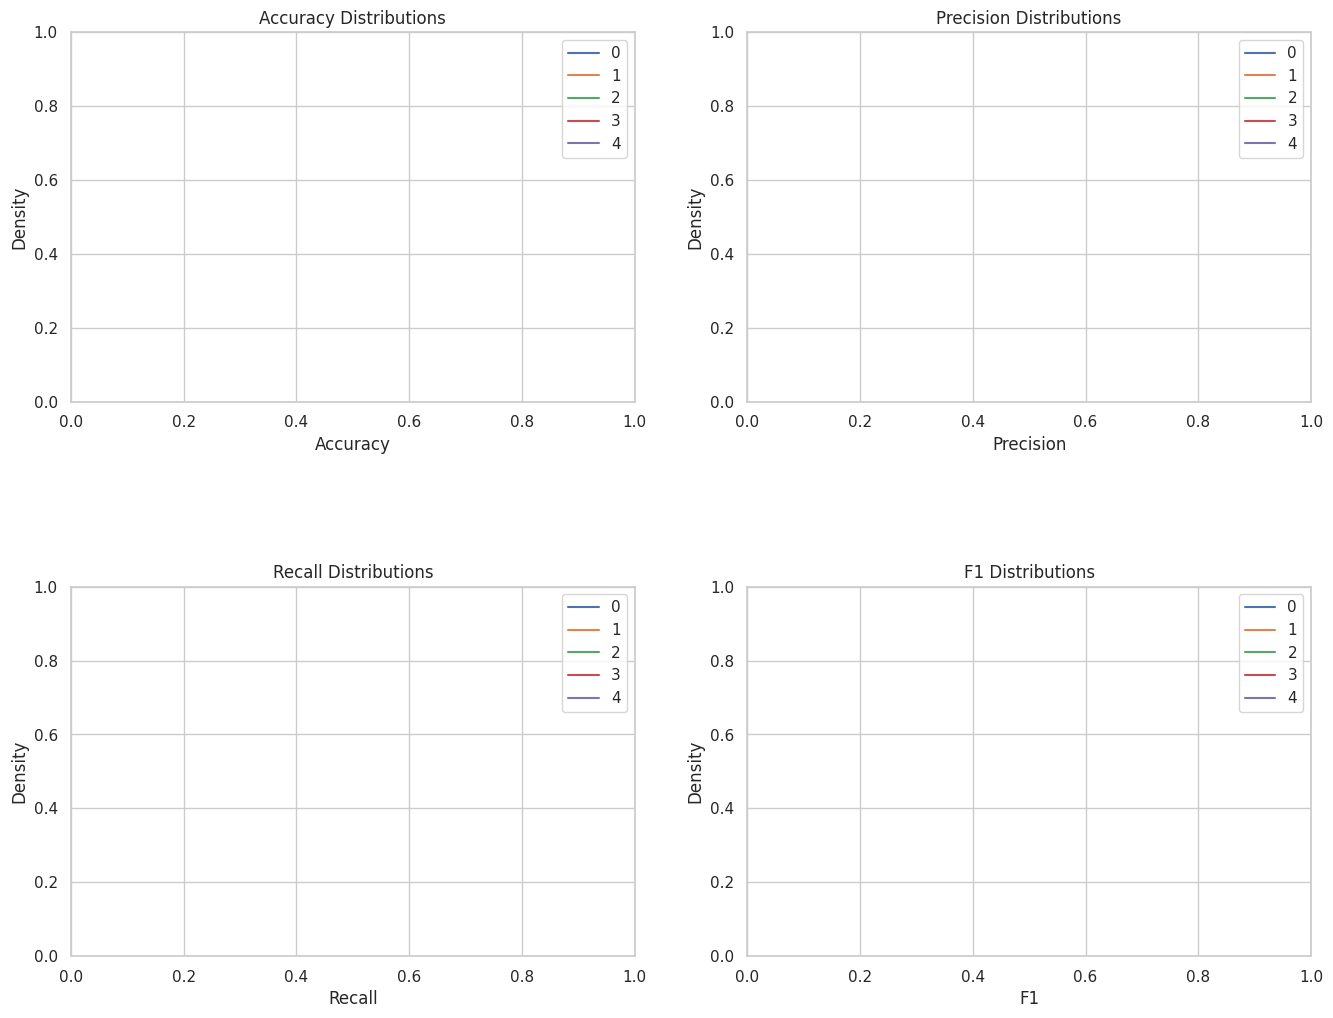

In [15]:
dfT = merged_df.T
dfT.columns = dfT.iloc[0]
dfT = dfT.drop(dfT.index[0])  # Drop the first row by its label
print(dfT)

rowCombinations = {
    'Accuracy': ['AccuracyA1', 'AccuracyA2', 'AccuracyB1', 'AccuracyB2', 'AccuracyC'],
    'Precision': ['PrecisionA1', 'PrecisionA2', 'PrecisionB1', 'PrecisionB2', 'PrecisionC'],
    'Recall': ['RecallA1', 'RecallA2', 'RecallB1', 'RecallB2', 'RecallC'],
    'F1': ['F1A1', 'F1A2', 'F1B1', 'F1B2', 'F1C']
}

# Create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot the overlapped distributions for each row combination
for i, (row_name, row_cols) in enumerate(rowCombinations.items()):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    for model in merged_df['Model'].unique():
        values = [merged_df.loc[merged_df['Model'] == model, col].values for col in row_cols]
        sns.kdeplot(data=values, ax=ax, common_norm=False, legend=True, label=model)

    ax.set_title(f"{row_name} Distributions")
    ax.set_xlabel(row_name)
    ax.set_ylabel("Density")

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

IndexError: index 4 is out of bounds for axis 1 with size 2

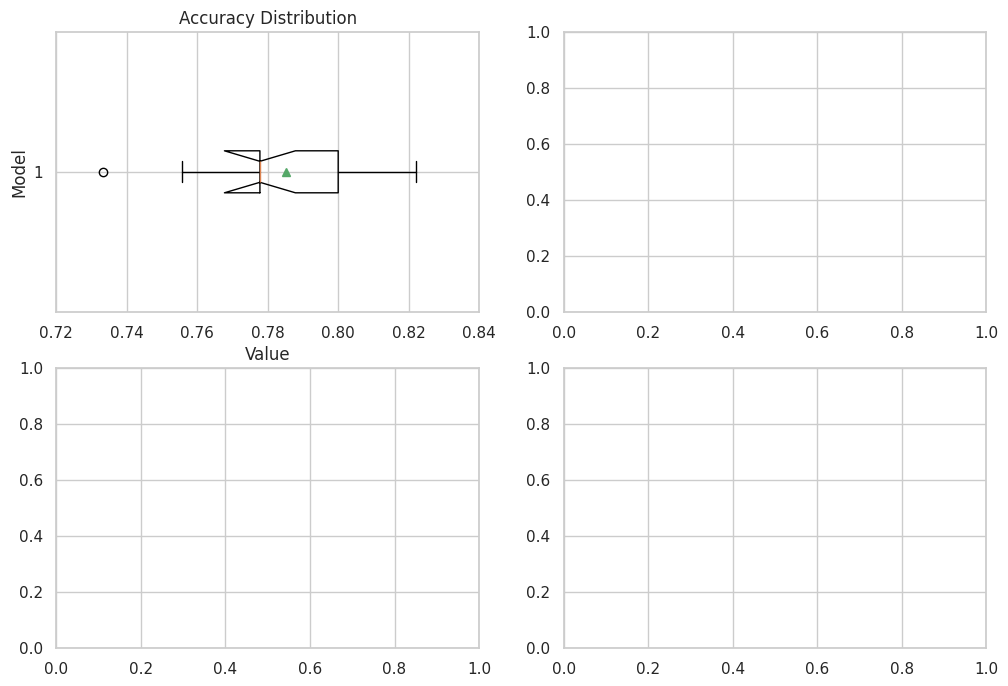

In [16]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
n_rows = 2  # Adjust based on the number of metrics to plot per row
n_cols = 2  # Adjust based on the number of metrics you have

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 8))

# Loop through each metric and plot the distribution across models
for i, metric in enumerate(metrics):
    for j, col in enumerate(merged_df.columns[1:]):  # Skip the first column (Model)
        if metric in col:
            metric_data = merged_df[col]
            axes[i, j].boxplot(metric_data, vert=False, showmeans=True, notch=True)
            axes[i, j].set_title(f"{metric} Distribution")
            axes[i, j].set_xlabel("Value")
            axes[i, j].set_ylabel("Model")
            axes[i, j].set_xticks(axes[i, j].get_xticks())  # Rotate x-axis labels for better readability
            axes[i, j].tick_params(bottom=False)

# Adjust layout and display the plot
fig.suptitle("Distribution of Metrics Across Models")
plt.tight_layout()
plt.show()

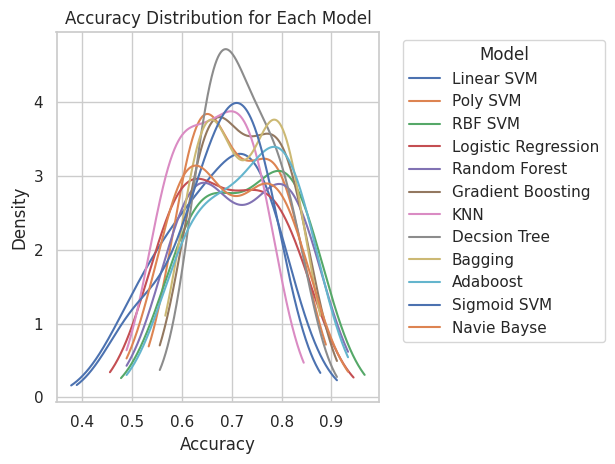

In [20]:
import matplotlib.pyplot as plt

# Subset the DataFrame to include only relevant columns
accdf = merged_df[['Model', 'AccuracyA1', 'AccuracyA2', 'AccuracyB1', 'AccuracyB2', 'AccuracyC','AccuracyD']]

# Set 'Model' column as index
accdf.set_index('Model', inplace=True)

# Transpose the DataFrame so that models are on the x-axis
accdf = accdf.T

# Plotting
for column in accdf.columns:
    accdf[column].plot(kind='density', label=column)

plt.title('Accuracy Distribution for Each Model')
plt.xlabel('Accuracy')
plt.ylabel('Density')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [21]:
melted_accdf = accdf.melt(id_vars=['Model'], value_vars=['AccuracyA1', 'AccuracyA2', 'AccuracyB1', 'AccuracyB2', 'AccuracyC', 'AccuracyD'], var_name='Metric', value_name='Accuracy')

# Plot overlapping distributions
plt.figure(figsize=(10, 6))
sns.violinplot(data=melted_accdf, x='Model', y='Accuracy', hue='Metric', split=True, inner="quart", palette="muted")
plt.title('Overlapping Distributions of Accuracy Metrics for Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

KeyError: "The following 'id_vars' are not present in the DataFrame: ['Model']"